# **Import Library:** 분석에 사용할 모듈 설치

In [1]:
!pip install --upgrade pip
!python -m pip install --user --upgrade pip
!pip install xgboost --user --upgrade
!pip install lightgbm --user --upgrade
!pip install catboost --user --upgrade
!pip install mlxtend --user --upgrade

In [2]:
# Ignore the warnings
import warnings
# warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# System related and data input controls
import os

# Data manipulation and visualization
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# Modeling algorithms
# General
import statsmodels.api as sm
from scipy import stats

# Regression
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree, export_text, export_graphviz
from sklearn.ensemble import VotingRegressor, BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from xgboost import plot_importance as plot_importance_xgb
from lightgbm import plot_importance as plot_importance_lgbm
from catboost import Pool, CatBoostRegressor
from mlxtend.regressor import StackingRegressor, StackingCVRegressor

# Model selection
from sklearn.model_selection import train_test_split, GridSearchCV

# Evaluation metrics
from sklearn import metrics
# for regression
from sklearn.metrics import mean_squared_error,  mean_absolute_error, mean_absolute_percentage_error

## 사용자 정의 함수

In [3]:
from module_regression import *

# **Base Algorithm:** Linear Regression

(404, 13) (404, 1)
(102, 13) (102, 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     68.67
Date:                Sat, 10 Dec 2022   Prob (F-statistic):          2.71e-105
Time:                        22:32:14   Log-Likelihood:                -1188.7
No. Observations:                 404   AIC:                             2413.
Df Residuals:                     386   BIC:                             2486.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.1290      2.030      8.439      0.000      13.138      21.120
CRIM          -9.7685      3.129     -3.122      0.002     -15.921      -3.616
ZN             3.6059      1.538      2.345      0.020       0.583       6.629
INDUS         -1.0711      1.956     -0.548      0.584      -4.917       2.774
NOX           -6.8870      2.163     -3.184      0.002     -11.140      -2.634
RM            28.7478      2.137     13.453      0.000      24.546      32.949
AGE           -3.1799      1.386     -2.294      0.022      -5.906      -0.454
DIS          -14.1170      2.480     -5.691      0.000     -18.994      -9.240
RAD           10.9837      4.247      2.586      0.010       2.633      19.334
PTRATIO       -8.1534      1.388     -5.874      0.000     -10.882      -5.424
B              4.1760      1.233      3.387      0.001       1.752       6.600
LSTAT        -10.0753      2.011     -5.010      0.000     -14.029      -6.122
TAX_2         -5.2255      1.405     -3.719      0.000      -7.988      -2.463
TAX_3         -5.7704      1.463     -3.945      0.000      -8.646      -2.894
TAX_4         -5.2109      1.538     -3.389      0.001      -8.234      -2.187
TAX_6        -13.2573      4.293     -3.088      0.002     -21.697      -4.817
TAX_7         -6.4422      2.668     -2.414      0.016     -11.688      -1.196
CHAS_0         7.7912      1.035      7.528      0.000       5.756       9.826
CHAS_1         9.3378      1.235      7.559      0.000       6.909      11.767
==============================================================================
Omnibus:                      241.516   Durbin-Watson:                   2.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3120.749
Skew:                           2.289   Prob(JB):                         0.00
Kurtosis:                      15.823   Cond. No.                     4.52e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.21e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

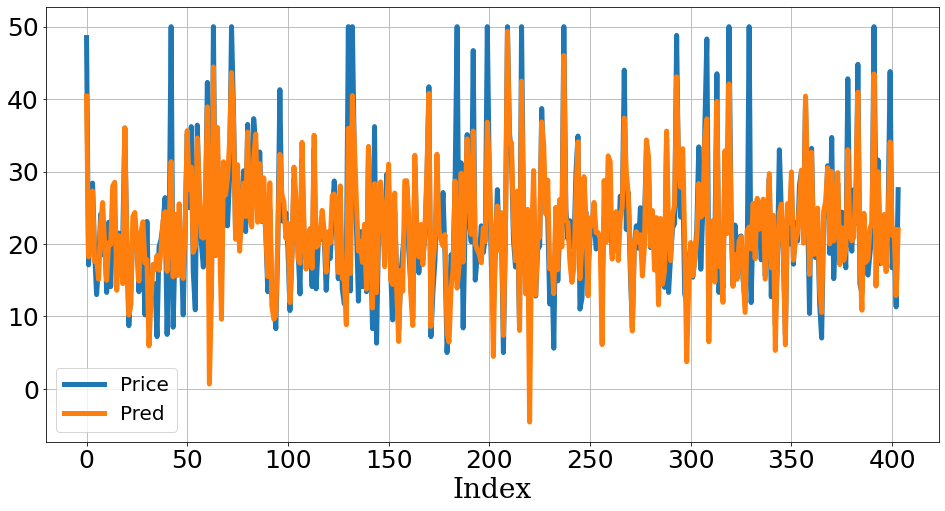

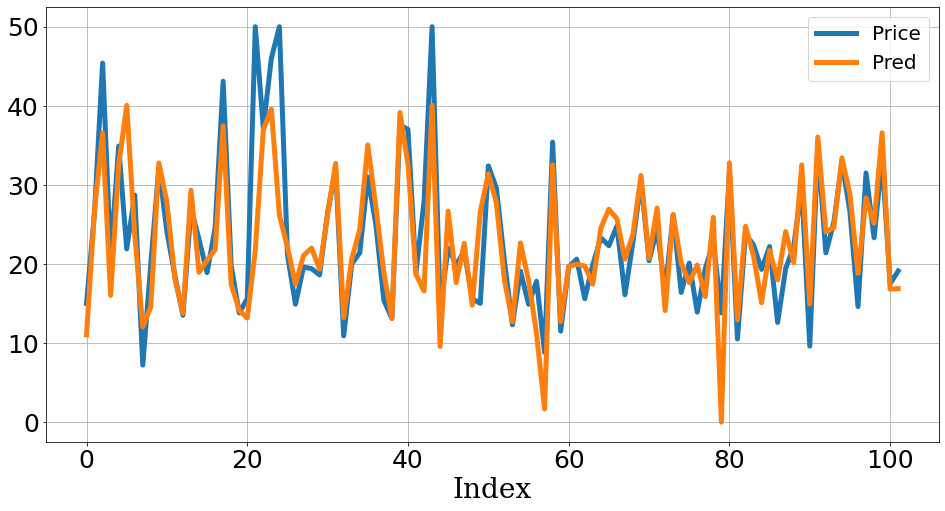

MAE   MSE  MAPE
Train 3.07 21.05  0.16
Test  3.51 31.34  0.17

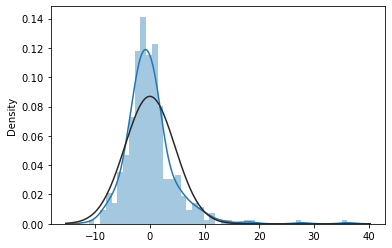

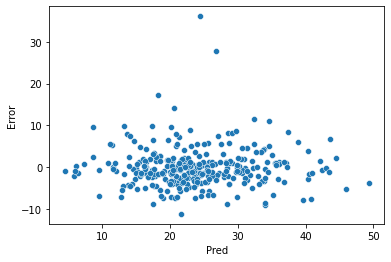

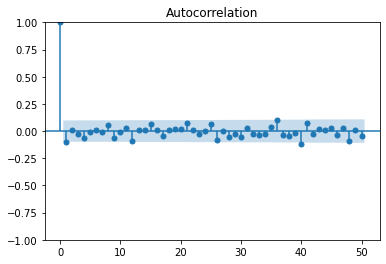

Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics       0.86               0.73             9.18   
p-value               0.00               0.03             0.51   
Alternative            NaN          two-sided              NaN   

                 Autocorr(lag50)  
Test Statistics            50.77  
p-value                     0.44  
Alternative                  NaN

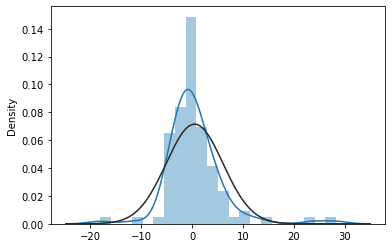

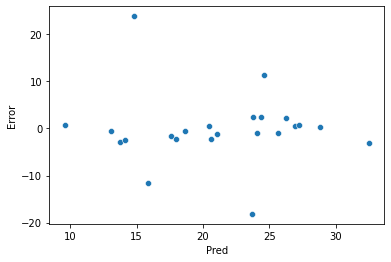

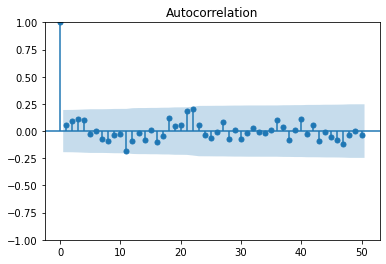

Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics       0.83               0.13             5.77   
p-value               0.00               0.00             0.83   
Alternative            NaN          two-sided              NaN   

                 Autocorr(lag50)  
Test Statistics            41.83  
p-value                     0.79  
Alternative                  NaN

In [4]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'BostonHousingPrice', 'Price_Modify_KK.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Linear Regression
X_train_fes = sm.add_constant(X_train_fes)
X_test_fes = sm.add_constant(X_test_fes)
model_lr = sm.OLS(Y_train, X_train_fes).fit()
display(model_lr.summary())

Y_trpred = pd.DataFrame(model_lr.predict(X_train_fes), columns=['Pred'])
Y_tepred = pd.DataFrame(model_lr.predict(X_test_fes), columns=['Pred'])
plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_lr = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_lr)

# 에러 분석
Resid_tr = Y_train - Y_trpred.values
Resid_tr.columns = ['Error']
Resid_te = Y_test - Y_tepred.values
Resid_te.columns = ['Error']

Error_tr = error_analysis(X_train_fes, Y_trpred, Resid_tr, graph_on=True)
display(Error_tr)
Error_te = error_analysis(X_test_fes, Y_tepred, Resid_te, graph_on=True)
display(Error_te)

# **Advanced Algorithm:** Regularization

## Ridge

(404, 13) (404, 1)
(102, 13) (102, 1)


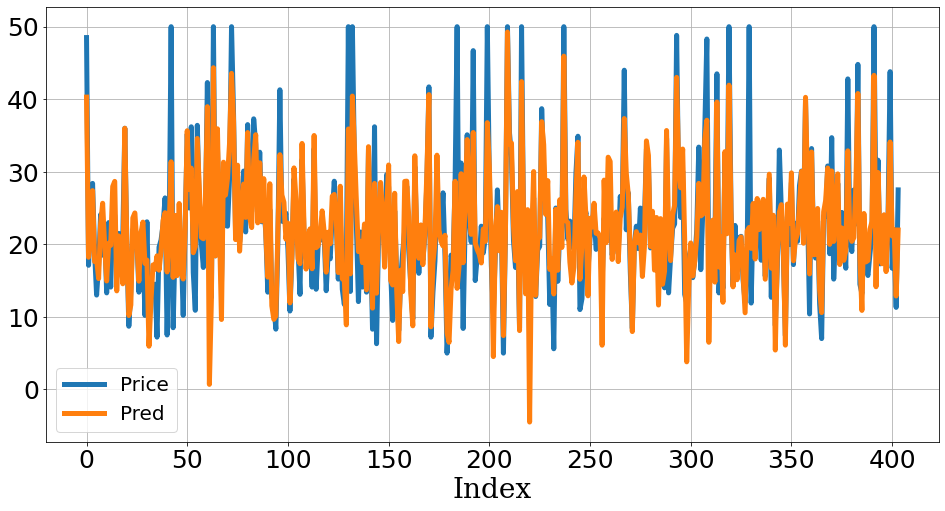

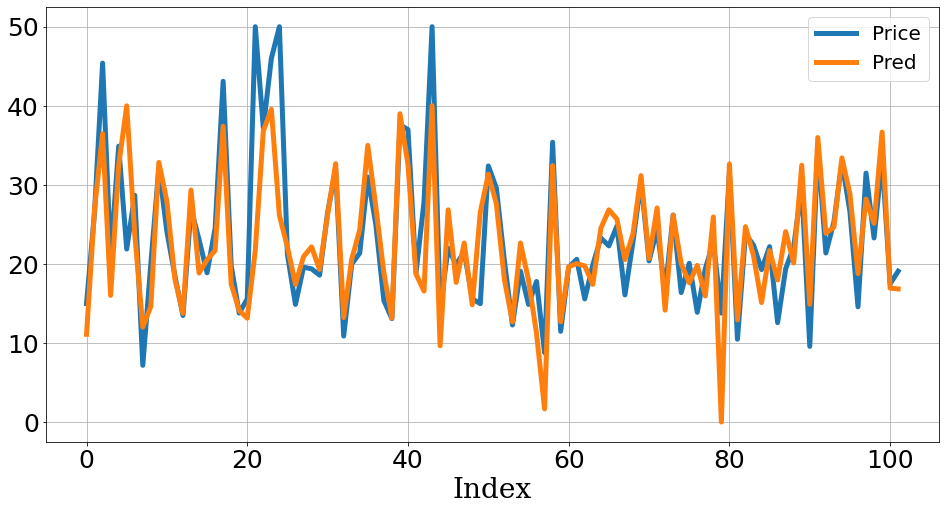

MAE   MSE  MAPE
Train 3.06 21.06  0.16
Test  3.51 31.30  0.17

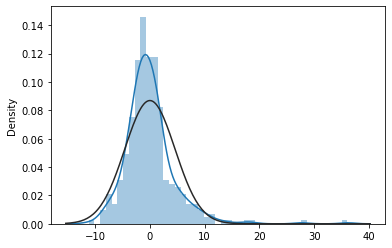

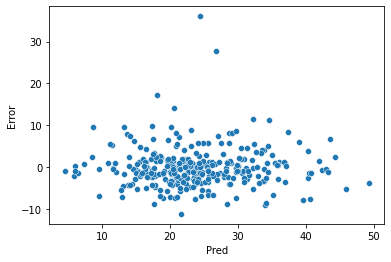

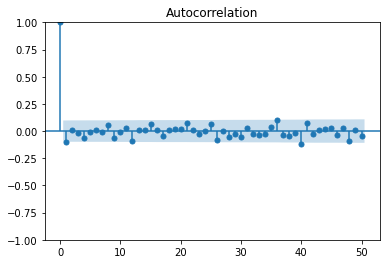

Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics       0.85               0.73             9.35   
p-value               0.00               0.03             0.50   
Alternative            NaN          two-sided              NaN   

                 Autocorr(lag50)  
Test Statistics            50.79  
p-value                     0.44  
Alternative                  NaN

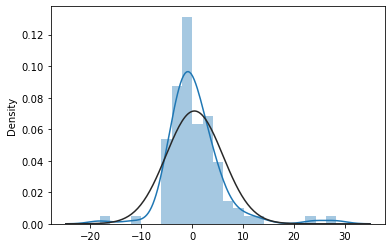

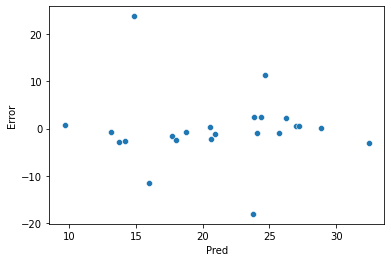

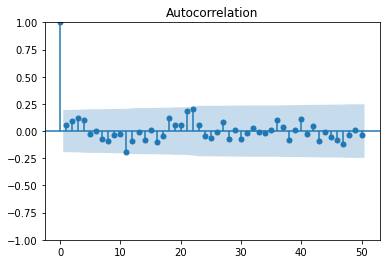

Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics       0.83               0.13             5.74   
p-value               0.00               0.00             0.84   
Alternative            NaN          two-sided              NaN   

                 Autocorr(lag50)  
Test Statistics            42.12  
p-value                     0.78  
Alternative                  NaN

In [5]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'BostonHousingPrice', 'Price_Modify_KK.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Ridge
alpha_weight = 0.05
model_ridge = Ridge(alpha=alpha_weight, fit_intercept=True, 
                    normalize=False, random_state=123)    # 정규화 스케일링 = False
model_ridge.fit(X_train_fes, Y_train)

Y_trpred = pd.DataFrame(model_ridge.predict(X_train_fes), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model_ridge.predict(X_test_fes), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_ridge = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_ridge)

# 에러 분석
Resid_tr = Y_train - Y_trpred.values
Resid_tr.columns = ['Error']
Resid_te = Y_test - Y_tepred.values
Resid_te.columns = ['Error']

Error_tr = error_analysis(X_train_fes, Y_trpred, Resid_tr, graph_on=True)
display(Error_tr)
Error_te = error_analysis(X_test_fes, Y_tepred, Resid_te, graph_on=True)
display(Error_te)

## Lasso

(404, 13) (404, 1)
(102, 13) (102, 1)


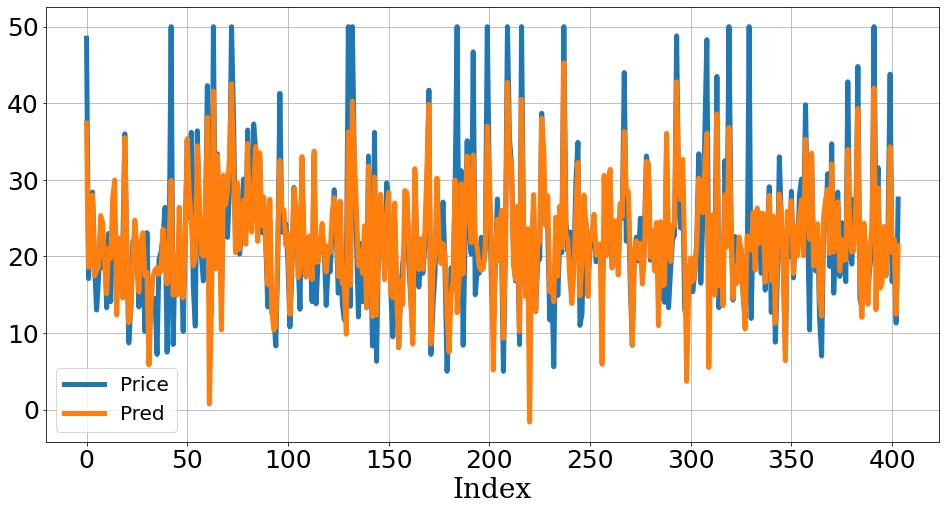

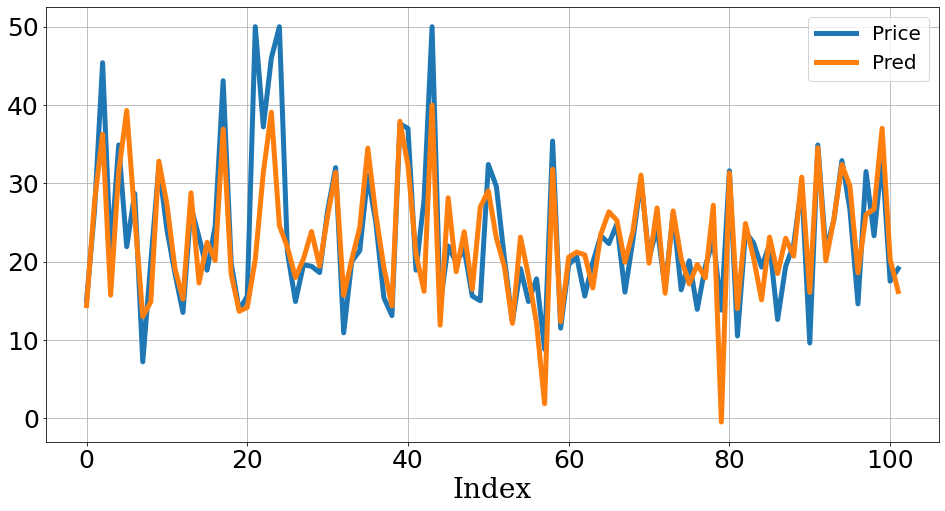

MAE   MSE  MAPE
Train 3.20 23.34  0.17
Test  3.75 34.78  0.18

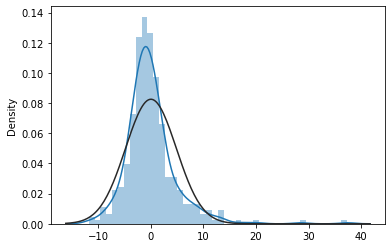

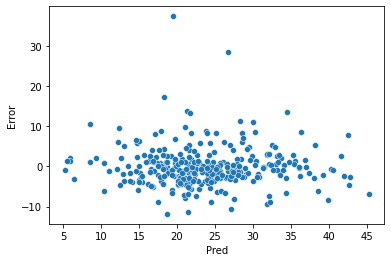

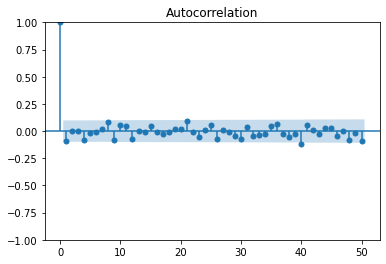

Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics       0.85               0.73            12.97   
p-value               0.00               0.03             0.23   
Alternative            NaN          two-sided              NaN   

                 Autocorr(lag50)  
Test Statistics            52.84  
p-value                     0.36  
Alternative                  NaN

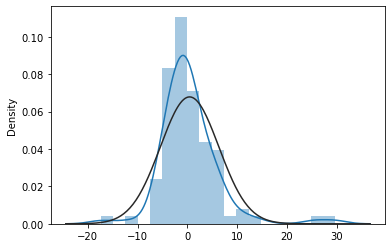

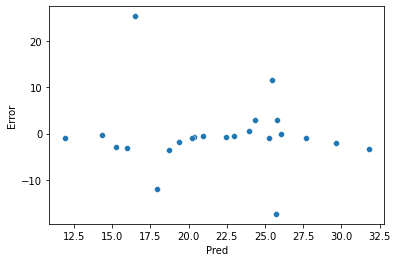

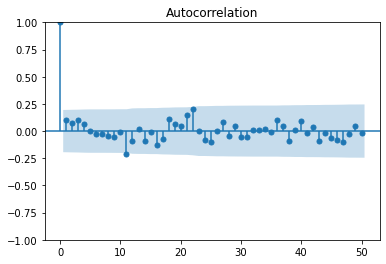

Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics       0.84               0.13             3.85   
p-value               0.00               0.00             0.95   
Alternative            NaN          two-sided              NaN   

                 Autocorr(lag50)  
Test Statistics            40.54  
p-value                     0.83  
Alternative                  NaN

In [6]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'BostonHousingPrice', 'Price_Modify_KK.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Lasso
alpha_weight = 0.05
model_lasso = Lasso(alpha=alpha_weight, fit_intercept=True, 
                    normalize=False, random_state=123)    # 정규화 스케일링 = False
model_lasso.fit(X_train_fes, Y_train)

Y_trpred = pd.DataFrame(model_lasso.predict(X_train_fes), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model_lasso.predict(X_test_fes), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_lasso = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_lasso)

# 에러 분석
Resid_tr = Y_train - Y_trpred.values
Resid_tr.columns = ['Error']
Resid_te = Y_test - Y_tepred.values
Resid_te.columns = ['Error']

Error_tr = error_analysis(X_train_fes, Y_trpred, Resid_tr, graph_on=True)
display(Error_tr)
Error_te = error_analysis(X_test_fes, Y_tepred, Resid_te, graph_on=True)
display(Error_te)

## Elastic Net

(404, 13) (404, 1)
(102, 13) (102, 1)


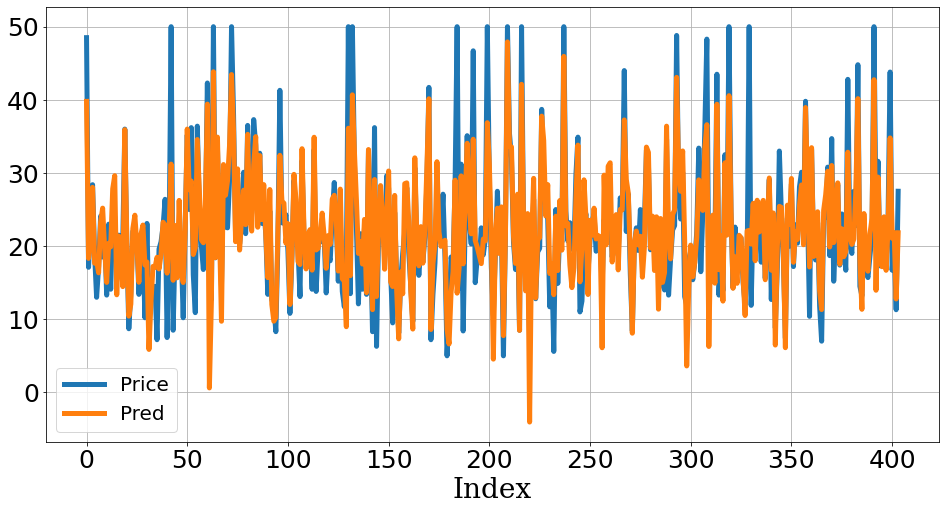

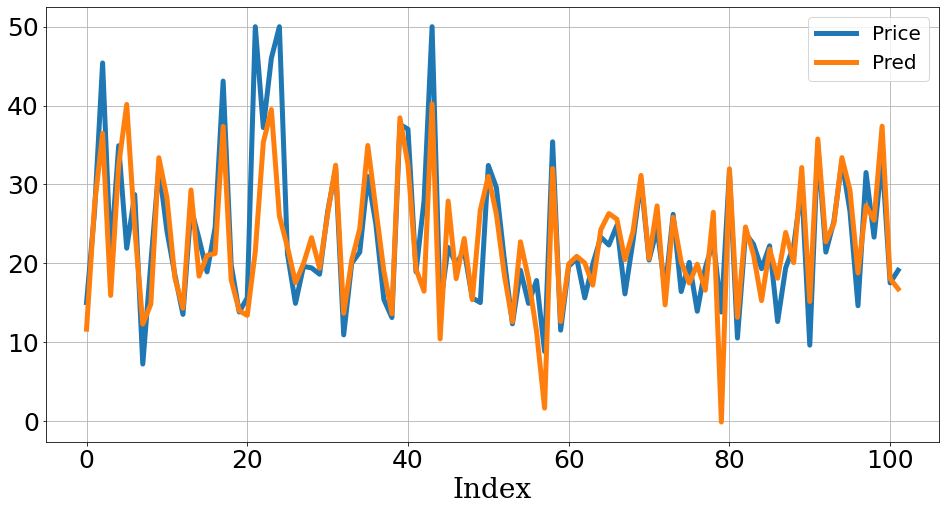

MAE   MSE  MAPE
Train 3.06 21.35  0.16
Test  3.56 32.00  0.17

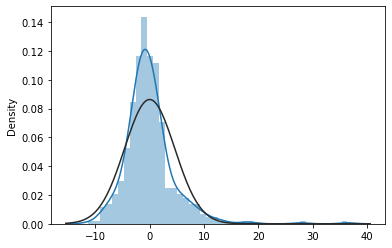

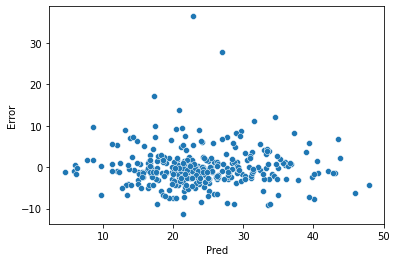

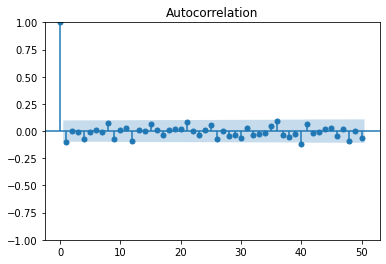

Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics       0.85               0.73            10.41   
p-value               0.00               0.03             0.40   
Alternative            NaN          two-sided              NaN   

                 Autocorr(lag50)  
Test Statistics            51.37  
p-value                     0.42  
Alternative                  NaN

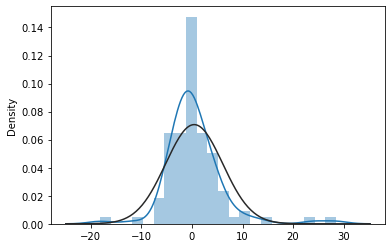

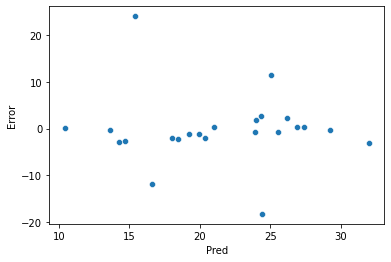

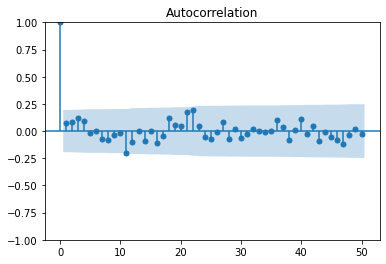

Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics       0.83               0.13             5.21   
p-value               0.00               0.00             0.88   
Alternative            NaN          two-sided              NaN   

                 Autocorr(lag50)  
Test Statistics            42.16  
p-value                     0.78  
Alternative                  NaN

In [7]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'BostonHousingPrice', 'Price_Modify_KK.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Elastic Net
model_en = ElasticNet(alpha=0.01, l1_ratio=1, fit_intercept=True, 
                      normalize=False, random_state=123)    # 정규화 스케일링 = False
model_en.fit(X_train_fes, Y_train)

Y_trpred = pd.DataFrame(model_en.predict(X_train_fes), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model_en.predict(X_test_fes), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_en = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_en)

# 에러 분석
Resid_tr = Y_train - Y_trpred.values
Resid_tr.columns = ['Error']
Resid_te = Y_test - Y_tepred.values
Resid_te.columns = ['Error']

Error_tr = error_analysis(X_train_fes, Y_trpred, Resid_tr, graph_on=True)
display(Error_tr)
Error_te = error_analysis(X_test_fes, Y_tepred, Resid_te, graph_on=True)
display(Error_te)

# **Advanced Algorithm:** Voting

(404, 13) (404, 1)
(102, 13) (102, 1)


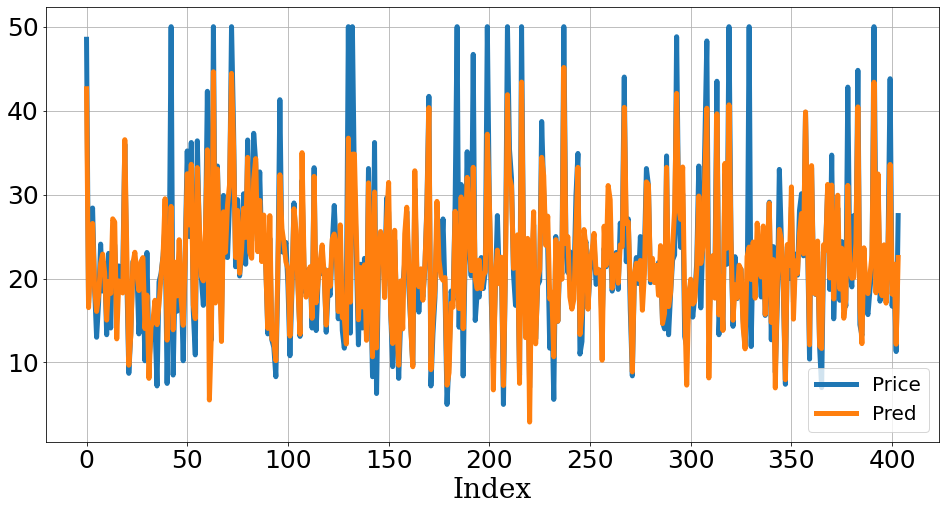

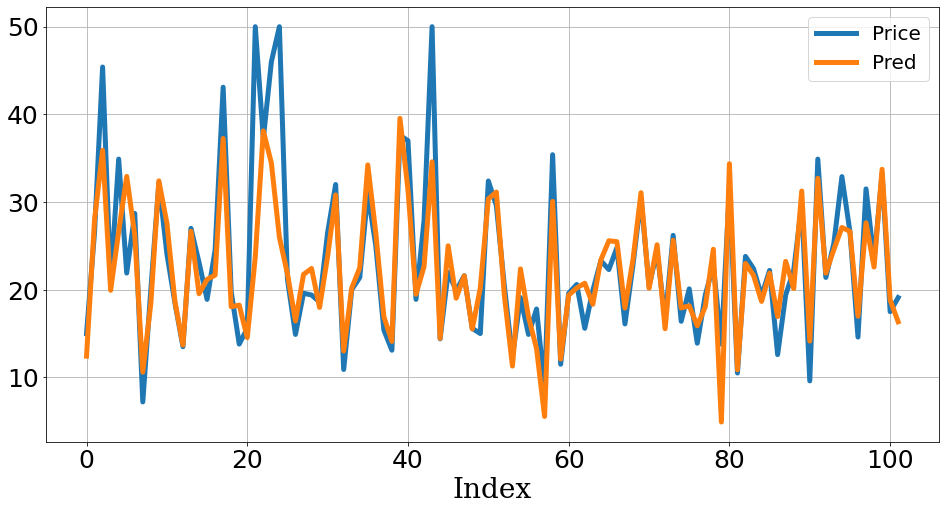

MAE   MSE  MAPE
Train 2.43 14.97  0.12
Test  2.86 25.04  0.12

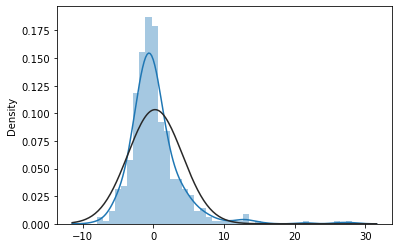

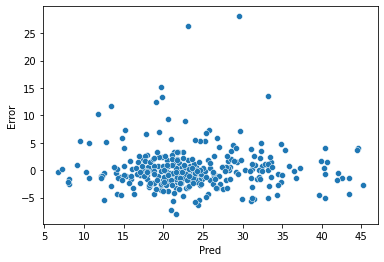

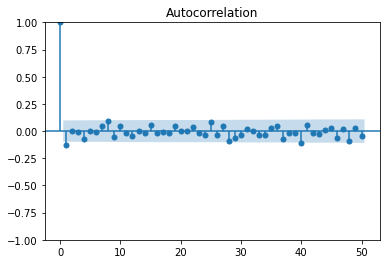

Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics       0.80               0.66            15.28   
p-value               0.00               0.01             0.12   
Alternative            NaN          two-sided              NaN   

                 Autocorr(lag50)  
Test Statistics            50.55  
p-value                     0.45  
Alternative                  NaN

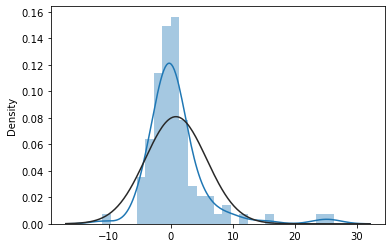

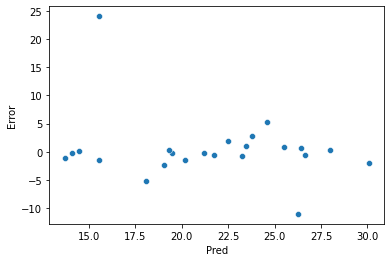

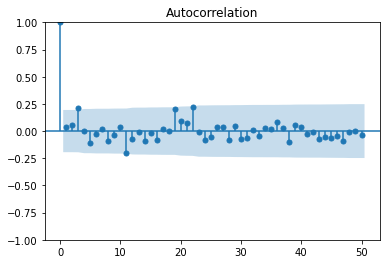

Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics       0.76               0.11             7.81   
p-value               0.00               0.00             0.65   
Alternative            NaN          two-sided              NaN   

                 Autocorr(lag50)  
Test Statistics            41.40  
p-value                     0.80  
Alternative                  NaN

In [8]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'BostonHousingPrice', 'Price_Modify_KK.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Voting
## Weak Learners
model_reg = LinearRegression()
model_knn = KNeighborsRegressor()
res = [('LR', model_reg), ('KNN', model_knn)]
model_voting = VotingRegressor(estimators=res)
model_voting.fit(X_train_fes, Y_train)

Y_trpred = pd.DataFrame(model_voting.predict(X_train_fes), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model_voting.predict(X_test_fes), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_voting = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_voting)

# 에러 분석
Resid_tr = Y_train - Y_trpred.values
Resid_tr.columns = ['Error']
Resid_te = Y_test - Y_tepred.values
Resid_te.columns = ['Error']

Error_tr = error_analysis(X_train_fes, Y_trpred, Resid_tr, graph_on=True)
display(Error_tr)
Error_te = error_analysis(X_test_fes, Y_tepred, Resid_te, graph_on=True)
display(Error_te)

# **Advanced Algorithm:** Bagging

##  Decision Tree

(404, 13) (404, 1)
(102, 13) (102, 1)


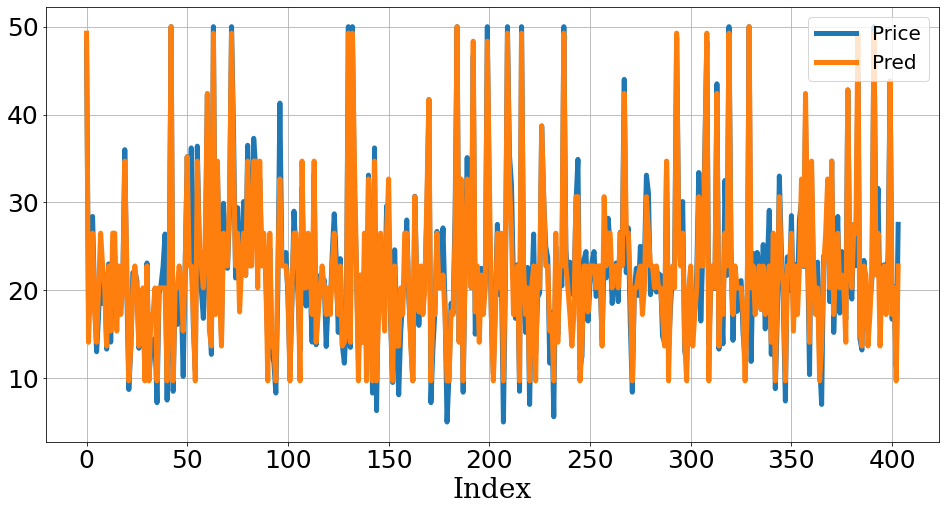

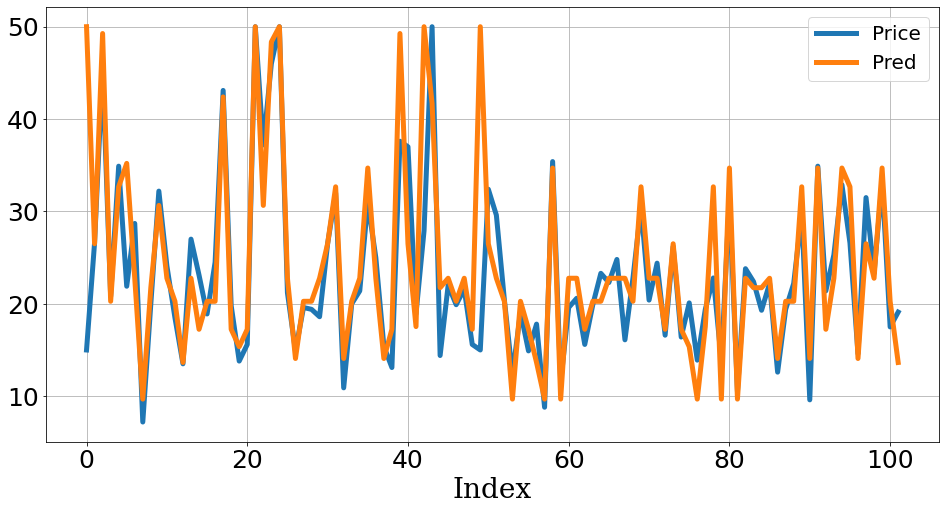

MAE   MSE  MAPE
Train 1.92  6.37  0.11
Test  3.51 42.36  0.18

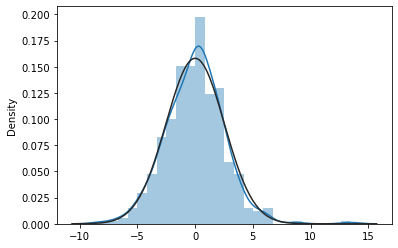

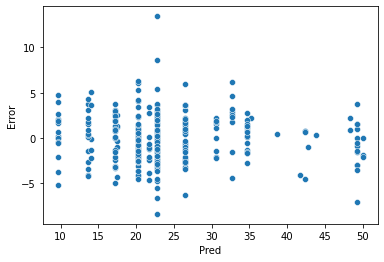

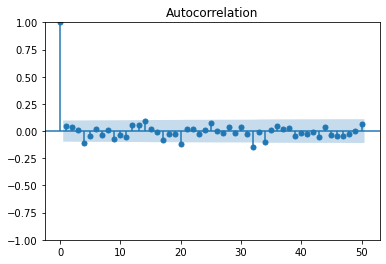

Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics       0.98               1.06            11.05   
p-value               0.00               0.70             0.35   
Alternative            NaN          two-sided              NaN   

                 Autocorr(lag50)  
Test Statistics            57.18  
p-value                     0.23  
Alternative                  NaN

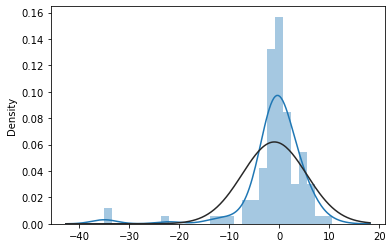

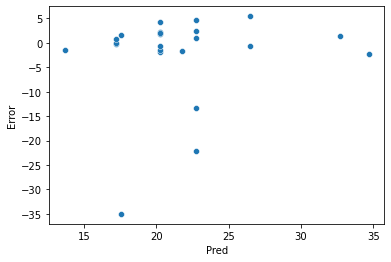

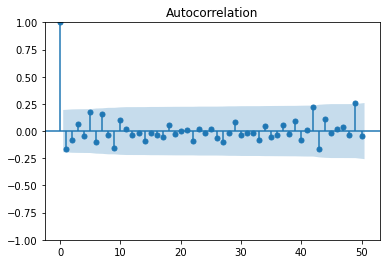

Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics       0.69               0.18            15.79   
p-value               0.00               0.00             0.11   
Alternative            NaN          two-sided              NaN   

                 Autocorr(lag50)  
Test Statistics            57.74  
p-value                     0.21  
Alternative                  NaN

In [9]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'BostonHousingPrice', 'Price_Modify_KK.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Decision Tree
model_dt = DecisionTreeRegressor(criterion='squared_error', max_depth=5,
                                 random_state=123)
model_dt.fit(X_train_fes, Y_train)

Y_trpred = pd.DataFrame(model_dt.predict(X_train_fes), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model_dt.predict(X_test_fes), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_dt = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_dt)

# 에러 분석
Resid_tr = Y_train - Y_trpred.values
Resid_tr.columns = ['Error']
Resid_te = Y_test - Y_tepred.values
Resid_te.columns = ['Error']

Error_tr = error_analysis(X_train_fes, Y_trpred, Resid_tr, graph_on=True)
display(Error_tr)
Error_te = error_analysis(X_test_fes, Y_tepred, Resid_te, graph_on=True)
display(Error_te)

## Random Forest

(404, 13) (404, 1)
(102, 13) (102, 1)


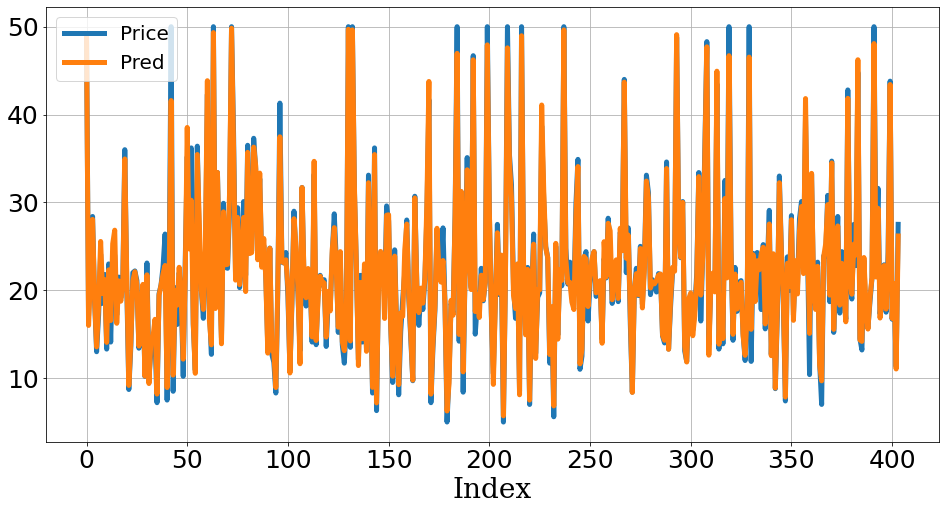

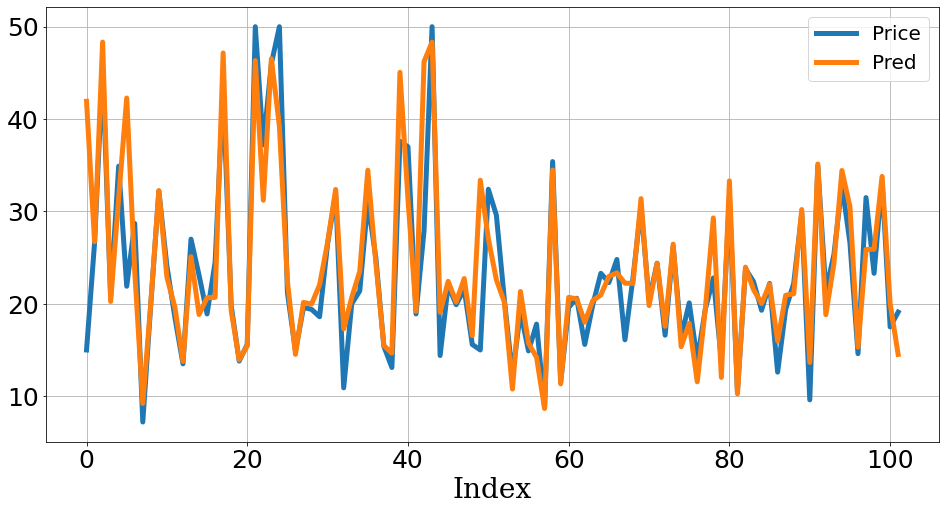

MAE   MSE  MAPE
Train 0.86  1.55  0.04
Test  2.71 25.67  0.13

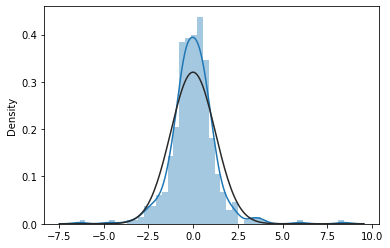

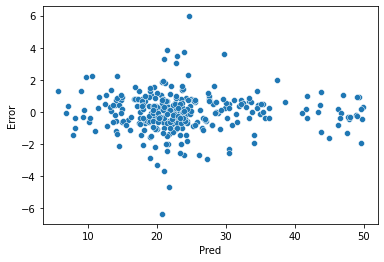

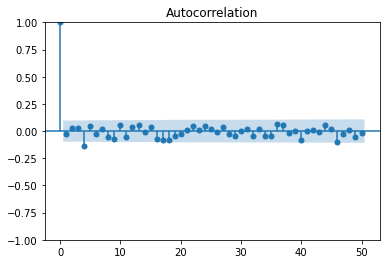

Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics       0.91               0.70            14.52   
p-value               0.00               0.02             0.15   
Alternative            NaN          two-sided              NaN   

                 Autocorr(lag50)  
Test Statistics            49.71  
p-value                     0.49  
Alternative                  NaN

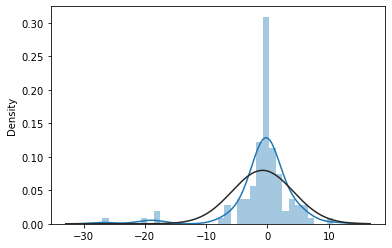

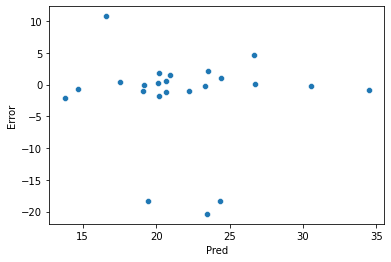

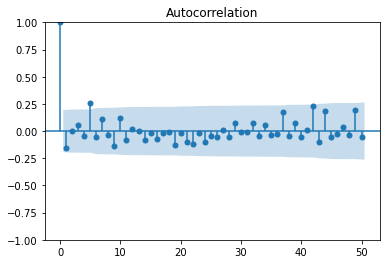

Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics       0.73               0.12            15.91   
p-value               0.00               0.00             0.10   
Alternative            NaN          two-sided              NaN   

                 Autocorr(lag50)  
Test Statistics            62.15  
p-value                     0.12  
Alternative                  NaN

In [10]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'BostonHousingPrice', 'Price_Modify_KK.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=123)
model_rf.fit(X_train_fes, Y_train)

Y_trpred = pd.DataFrame(model_rf.predict(X_train_fes), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model_rf.predict(X_test_fes), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_rf = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_rf)

# 에러 분석
Resid_tr = Y_train - Y_trpred.values
Resid_tr.columns = ['Error']
Resid_te = Y_test - Y_tepred.values
Resid_te.columns = ['Error']

Error_tr = error_analysis(X_train_fes, Y_trpred, Resid_tr, graph_on=True)
display(Error_tr)
Error_te = error_analysis(X_test_fes, Y_tepred, Resid_te, graph_on=True)
display(Error_te)

## Random Forest with Hyperparameter Tuning

(404, 13) (404, 1)
(102, 13) (102, 1)
최적 하이퍼 파라미터:  {'max_depth': 11, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 100}


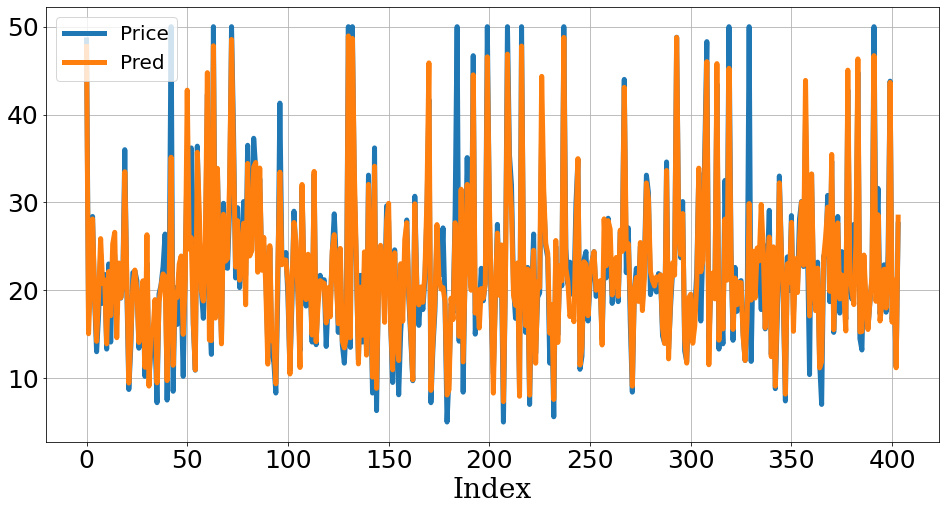

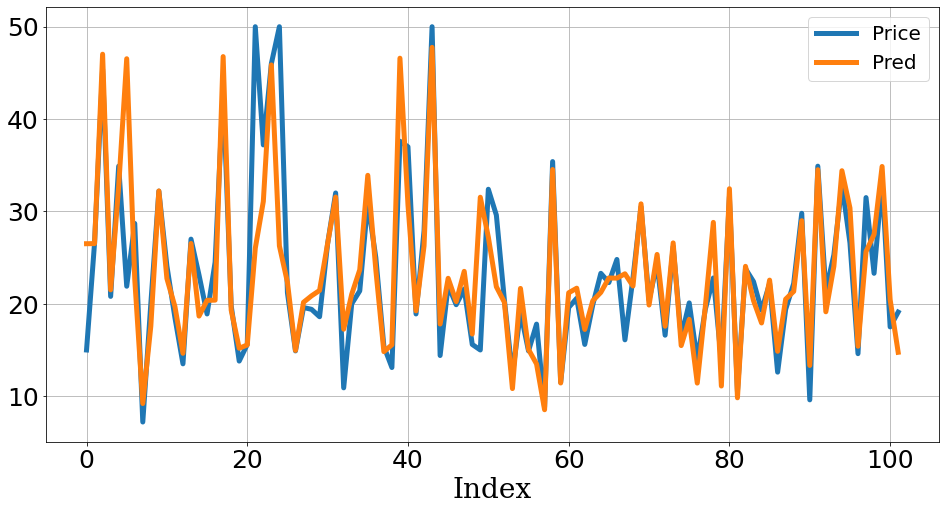

MAE   MSE  MAPE
Train 1.62  7.47  0.08
Test  2.87 28.39  0.13

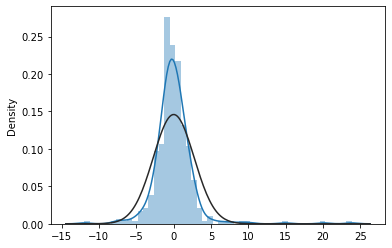

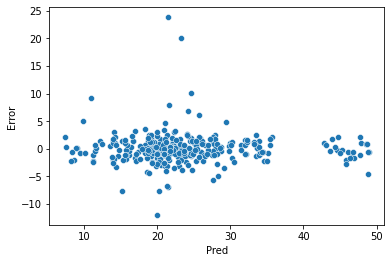

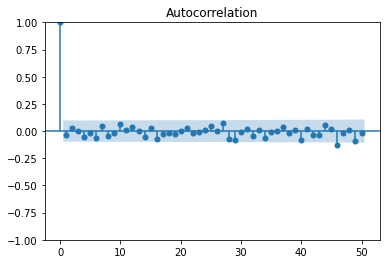

Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics       0.76               0.76             7.09   
p-value               0.00               0.07             0.72   
Alternative            NaN          two-sided              NaN   

                 Autocorr(lag50)  
Test Statistics            41.93  
p-value                     0.78  
Alternative                  NaN

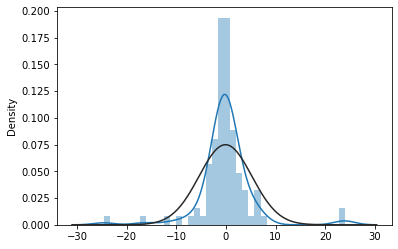

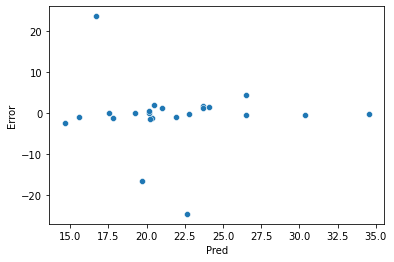

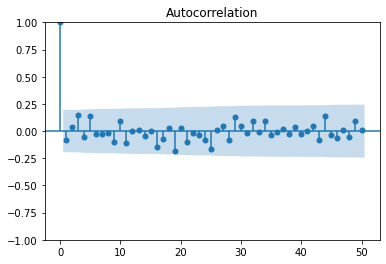

Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics       0.75               0.07             7.96   
p-value               0.00               0.00             0.63   
Alternative            NaN          two-sided              NaN   

                 Autocorr(lag50)  
Test Statistics            39.71  
p-value                     0.85  
Alternative                  NaN

In [11]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'BostonHousingPrice', 'Price_Modify_KK.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Random Forest
model_rf = RandomForestRegressor(random_state=123)
params = {'n_estimators': [100],  
          'max_depth': [5, 7, 9, 11],   
          'min_samples_leaf': [5, 7, 9, 11],   
          'min_samples_split': [5, 7, 9, 11]}  
model_rf_cv = GridSearchCV(estimator=model_rf, param_grid=params, 
                           cv=5,   
                           n_jobs=-1)   
model_rf_cv.fit(X_train_fes, Y_train)
print("최적 하이퍼 파라미터: ", model_rf_cv.best_params_)

model_rf_cv_final = RandomForestRegressor(**model_rf_cv.best_params_)
model_rf_cv_final.fit(X_train_fes, Y_train)

Y_trpred = pd.DataFrame(model_rf_cv_final.predict(X_train_fes), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model_rf_cv_final.predict(X_test_fes), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_rf_cv_final = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_rf_cv_final)

# 에러 분석
Resid_tr = Y_train - Y_trpred.values
Resid_tr.columns = ['Error']
Resid_te = Y_test - Y_tepred.values
Resid_te.columns = ['Error']

Error_tr = error_analysis(X_train_fes, Y_trpred, Resid_tr, graph_on=True)
display(Error_tr)
Error_te = error_analysis(X_test_fes, Y_tepred, Resid_te, graph_on=True)
display(Error_te)

# **Advanced Algorithm:** Boosting

## Gradient Boosting

(404, 13) (404, 1)
(102, 13) (102, 1)


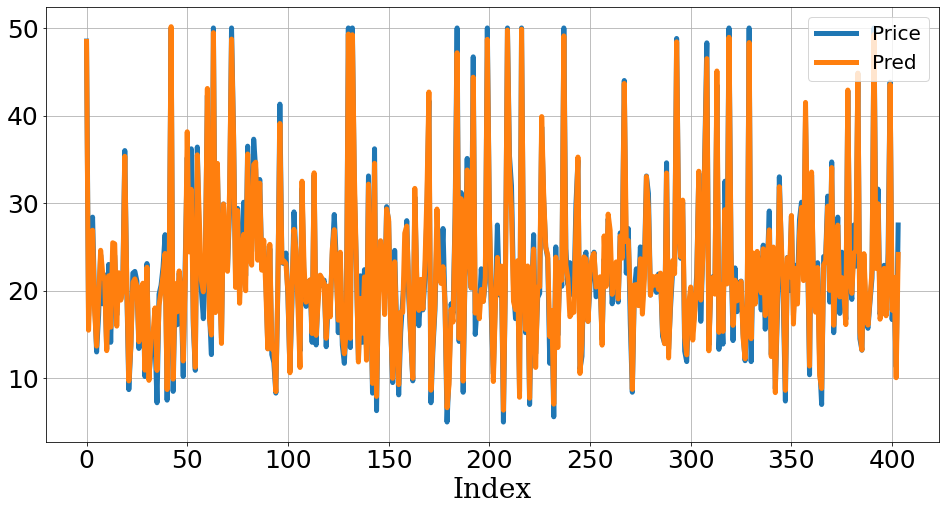

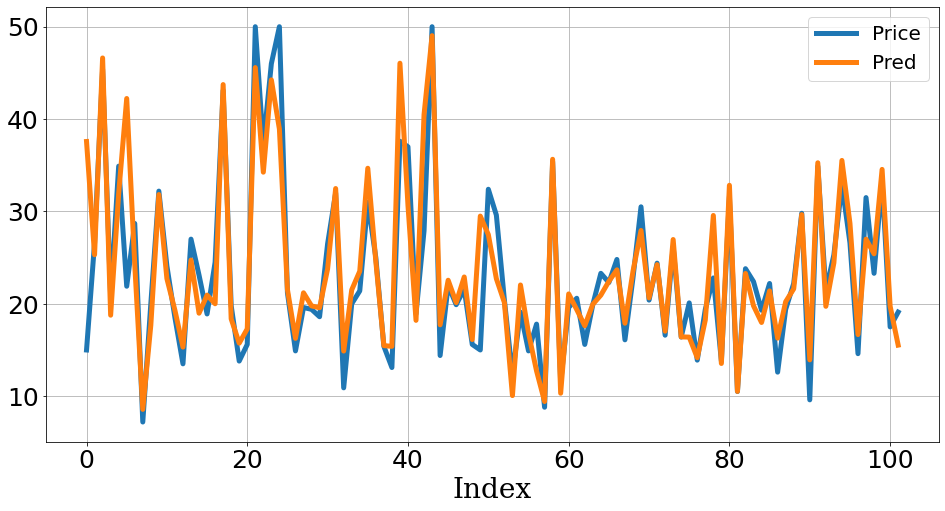

MAE   MSE  MAPE
Train 1.10  1.95  0.06
Test  2.61 20.01  0.13

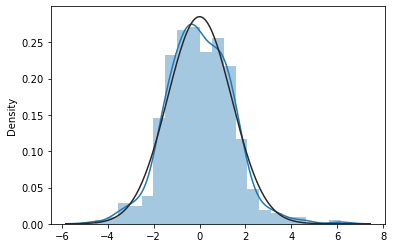

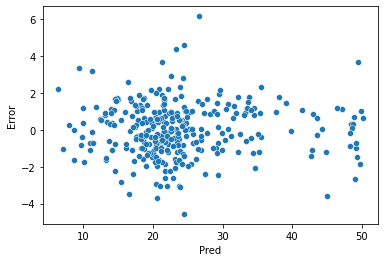

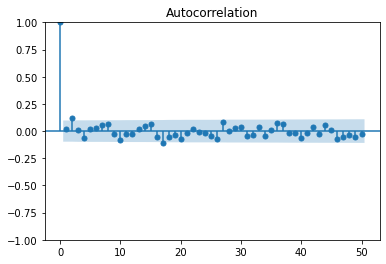

Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics       0.99               0.87            13.77   
p-value               0.00               0.34             0.18   
Alternative            NaN          two-sided              NaN   

                 Autocorr(lag50)  
Test Statistics            53.05  
p-value                     0.36  
Alternative                  NaN

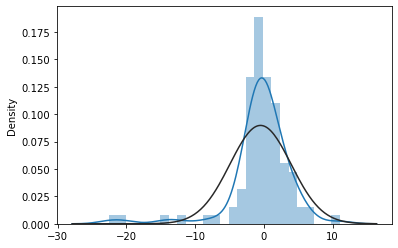

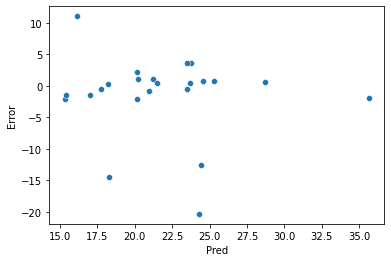

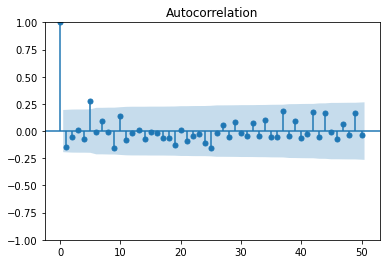

Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics       0.78               0.15            17.66   
p-value               0.00               0.00             0.06   
Alternative            NaN          two-sided              NaN   

                 Autocorr(lag50)  
Test Statistics            61.31  
p-value                     0.13  
Alternative                  NaN

In [12]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'BostonHousingPrice', 'Price_Modify_KK.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Gradient Boosting
model_gb = GradientBoostingRegressor(n_estimators=100,
                                     learning_rate=0.1,
                                     max_depth=3, random_state=123)
model_gb.fit(X_train_fes, Y_train)

Y_trpred = pd.DataFrame(model_gb.predict(X_train_fes), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model_gb.predict(X_test_fes), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_gb = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_gb)

# 에러 분석
Resid_tr = Y_train - Y_trpred.values
Resid_tr.columns = ['Error']
Resid_te = Y_test - Y_tepred.values
Resid_te.columns = ['Error']

Error_tr = error_analysis(X_train_fes, Y_trpred, Resid_tr, graph_on=True)
display(Error_tr)
Error_te = error_analysis(X_test_fes, Y_tepred, Resid_te, graph_on=True)
display(Error_te)

## GBM with Hyperparameter Tuning

(404, 13) (404, 1)
(102, 13) (102, 1)
최적 하이퍼 파라미터:  {'learning_rate': 0.2, 'max_depth': 7, 'min_samples_leaf': 9, 'min_samples_split': 5, 'n_estimators': 100}


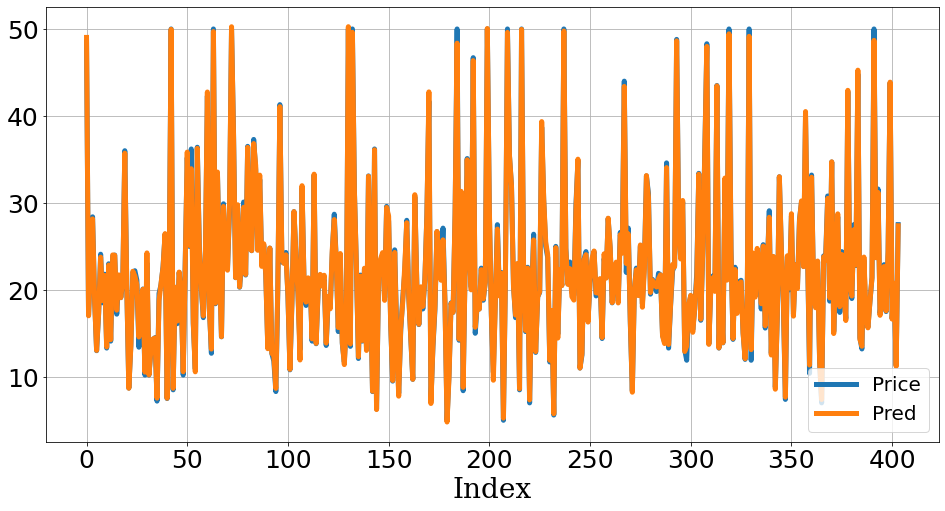

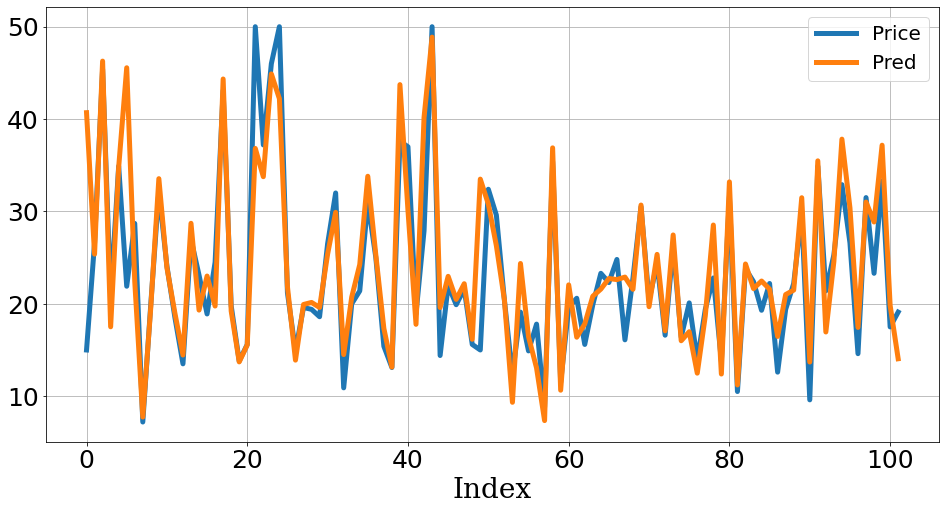

MAE   MSE  MAPE
Train 0.27  0.15  0.01
Test  2.90 25.93  0.14

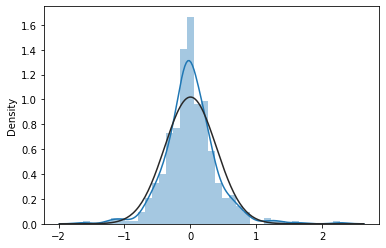

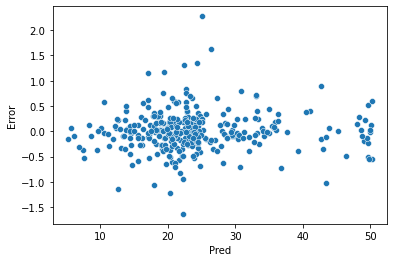

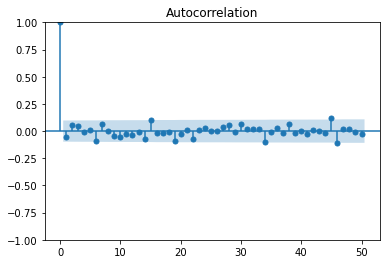

Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics       0.94               0.83            11.52   
p-value               0.00               0.22             0.32   
Alternative            NaN          two-sided              NaN   

                 Autocorr(lag50)  
Test Statistics            49.84  
p-value                     0.48  
Alternative                  NaN

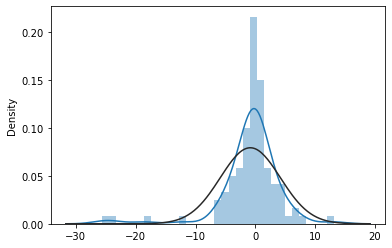

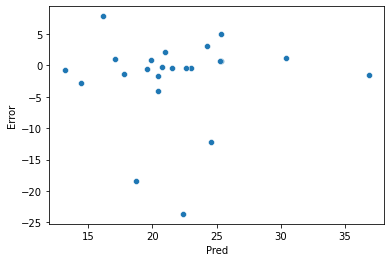

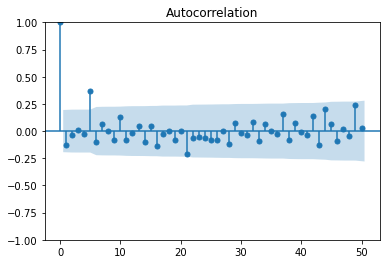

Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics       0.77               0.16            20.79   
p-value               0.00               0.00             0.02   
Alternative            NaN          two-sided              NaN   

                 Autocorr(lag50)  
Test Statistics            77.23  
p-value                     0.01  
Alternative                  NaN

In [13]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'BostonHousingPrice', 'Price_Modify_KK.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Gradient Boosting
model_gb = GradientBoostingRegressor()
params = {'n_estimators': [100],   
          'max_depth': [5, 7, 9, 11],    
          'min_samples_leaf': [5, 7, 9, 115],   
          'min_samples_split': [5, 7, 9, 11],  
          'learning_rate': [0.05, 0.1, 0.2]}   
model_gb_cv = GridSearchCV(estimator=model_gb, param_grid=params, 
                           cv=5,   
                           n_jobs=-1)   
model_gb_cv.fit(X_train_fes, Y_train)
print("최적 하이퍼 파라미터: ", model_gb_cv.best_params_)

model_gb_cv_final = GradientBoostingRegressor(**model_gb_cv.best_params_)
model_gb_cv_final.fit(X_train_fes, Y_train)

Y_trpred = pd.DataFrame(model_gb_cv_final.predict(X_train_fes), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model_gb_cv_final.predict(X_test_fes), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_gb_cv_final = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_gb_cv_final)

# 에러 분석
Resid_tr = Y_train - Y_trpred.values
Resid_tr.columns = ['Error']
Resid_te = Y_test - Y_tepred.values
Resid_te.columns = ['Error']

Error_tr = error_analysis(X_train_fes, Y_trpred, Resid_tr, graph_on=True)
display(Error_tr)
Error_te = error_analysis(X_test_fes, Y_tepred, Resid_te, graph_on=True)
display(Error_te)

## XGBoost

(404, 13) (404, 1)
(102, 13) (102, 1)


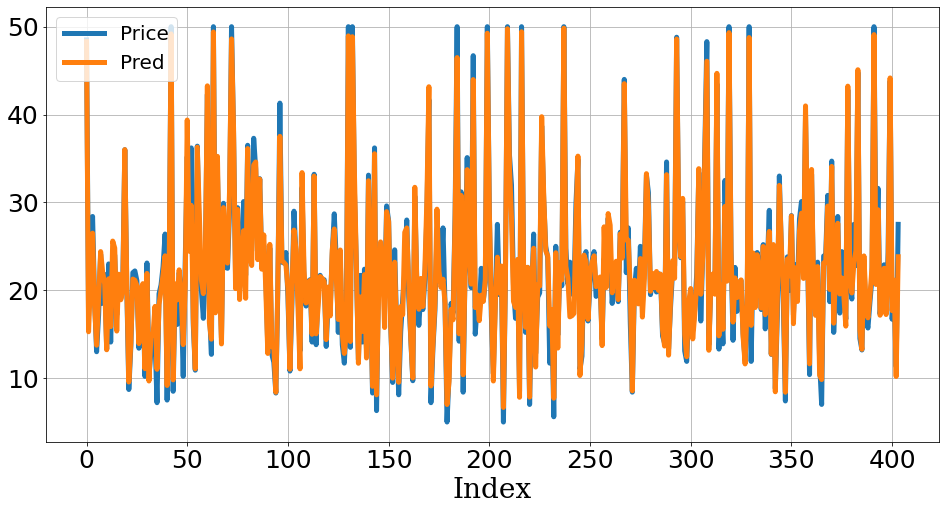

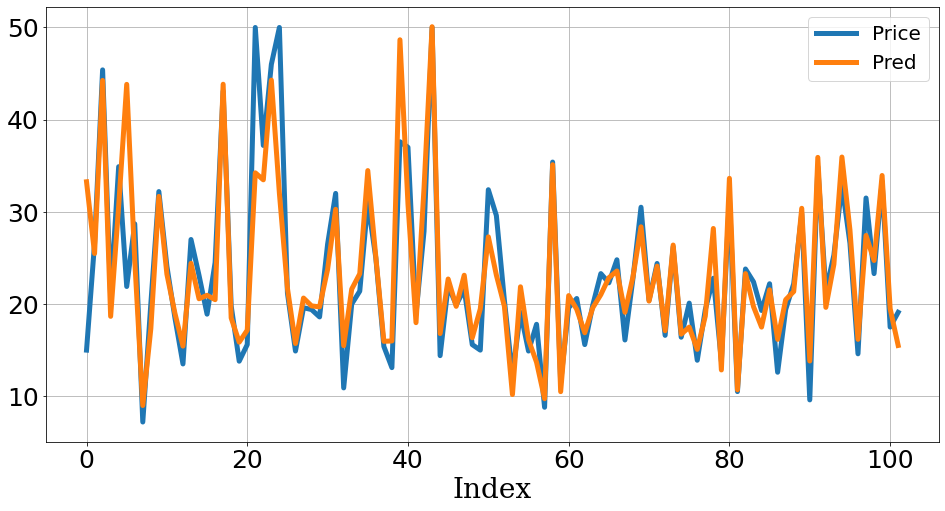

MAE   MSE  MAPE
Train 1.21  2.49  0.06
Test  2.58 20.04  0.12

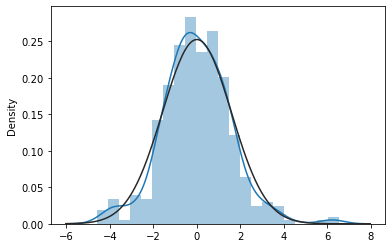

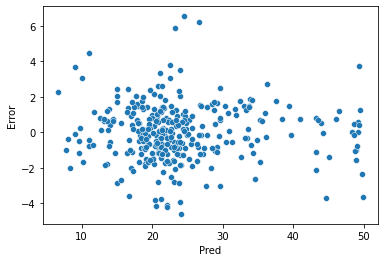

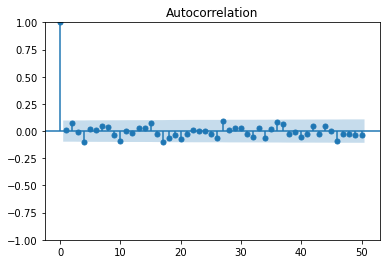

Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics       0.98               0.81            11.77   
p-value               0.00               0.16             0.30   
Alternative            NaN          two-sided              NaN   

                 Autocorr(lag50)  
Test Statistics            48.28  
p-value                     0.54  
Alternative                  NaN

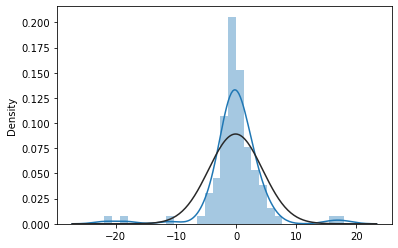

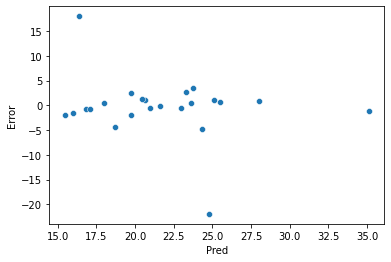

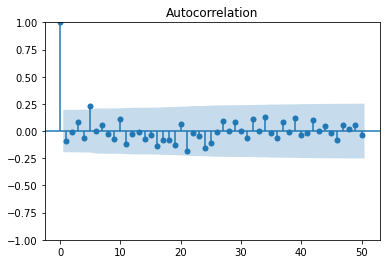

Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics       0.77               0.08            10.55   
p-value               0.00               0.00             0.39   
Alternative            NaN          two-sided              NaN   

                 Autocorr(lag50)  
Test Statistics            46.18  
p-value                     0.63  
Alternative                  NaN

In [14]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'BostonHousingPrice', 'Price_Modify_KK.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# XGBoost
model_xgb = XGBRegressor(n_estimators=100,
                         learning_rate=0.1,
                         max_depth=3, random_state=123)
model_xgb.fit(X_train_fes, Y_train)

Y_trpred = pd.DataFrame(model_xgb.predict(X_train_fes), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model_xgb.predict(X_test_fes), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_xgb = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_xgb)

# 에러 분석
Resid_tr = Y_train - Y_trpred.values
Resid_tr.columns = ['Error']
Resid_te = Y_test - Y_tepred.values
Resid_te.columns = ['Error']

Error_tr = error_analysis(X_train_fes, Y_trpred, Resid_tr, graph_on=True)
display(Error_tr)
Error_te = error_analysis(X_test_fes, Y_tepred, Resid_te, graph_on=True)
display(Error_te)

## XGBoost with Hyperparameter Tuning

(404, 13) (404, 1)
(102, 13) (102, 1)
최적 하이퍼 파라미터:  {'gamma': 0.7, 'max_depth': 5, 'min_child_weight': 11, 'n_estimators': 100}


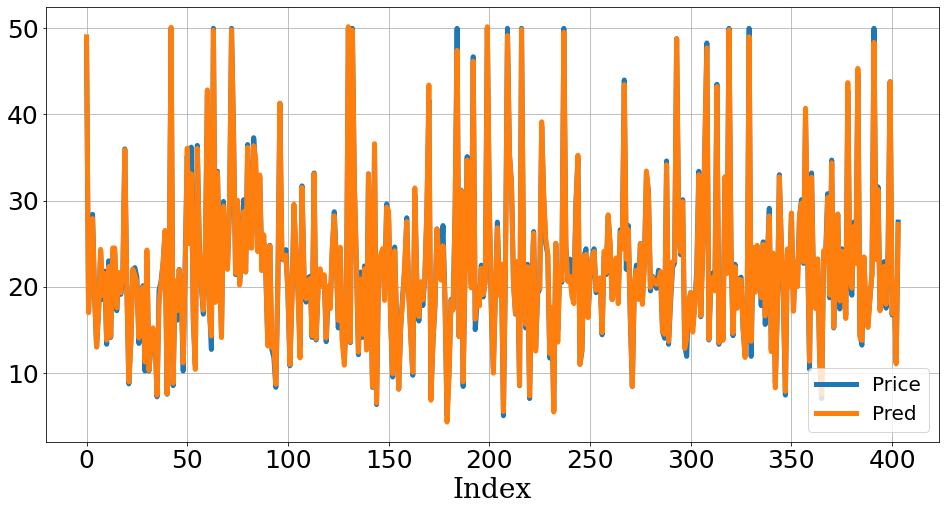

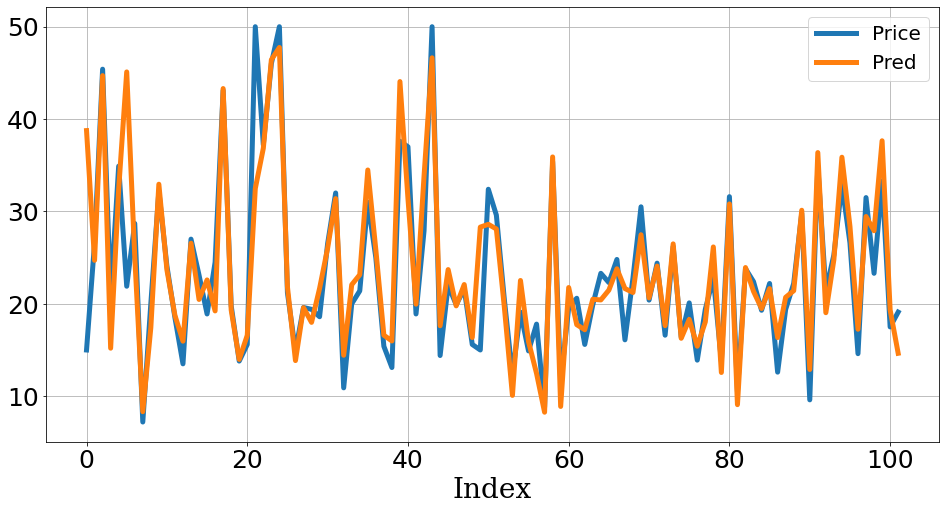

MAE   MSE  MAPE
Train 0.43  0.35  0.02
Test  2.61 21.45  0.13

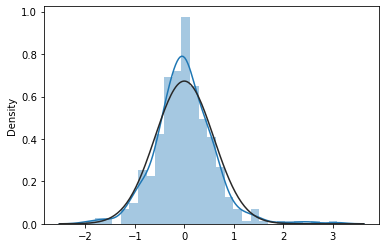

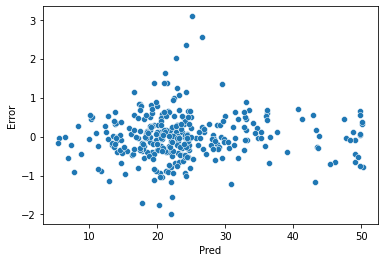

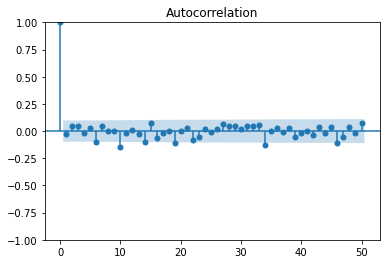

Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics       0.96               0.69            16.01   
p-value               0.00               0.01             0.10   
Alternative            NaN          two-sided              NaN   

                 Autocorr(lag50)  
Test Statistics            63.34  
p-value                     0.10  
Alternative                  NaN

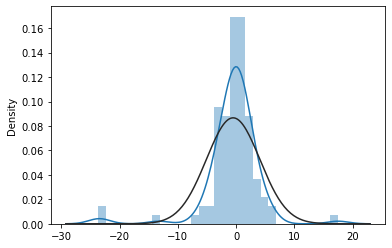

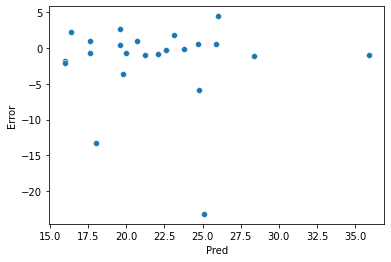

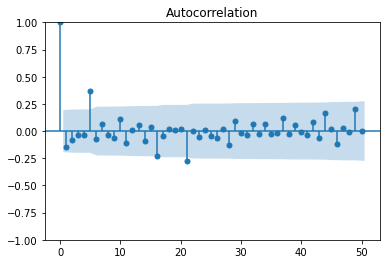

Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics       0.74               0.14            20.92   
p-value               0.00               0.00             0.02   
Alternative            NaN          two-sided              NaN   

                 Autocorr(lag50)  
Test Statistics            68.25  
p-value                     0.04  
Alternative                  NaN

In [15]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'BostonHousingPrice', 'Price_Modify_KK.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# XGBoost
model_xgb = XGBRegressor()
params = {'n_estimators': [100],   
          'max_depth': [5, 7, 9, 11],    
          'gamma': [0.1, 0.3, 0.5, 0.7, 0.9],    
          'min_child_weight': [5, 7, 9, 11]}   
model_xgb_cv = GridSearchCV(estimator=model_xgb, param_grid=params, 
                            cv=5,    
                            n_jobs=-1)    
model_xgb_cv.fit(X_train_fes, Y_train)
print("최적 하이퍼 파라미터: ", model_xgb_cv.best_params_)

model_xgb_cv_final = XGBRegressor(**model_xgb_cv.best_params_)
model_xgb_cv_final.fit(X_train_fes, Y_train)

Y_trpred = pd.DataFrame(model_xgb_cv_final.predict(X_train_fes), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model_xgb_cv_final.predict(X_test_fes), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_xgb_cv_final = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_xgb_cv_final)

# 에러 분석
Resid_tr = Y_train - Y_trpred.values
Resid_tr.columns = ['Error']
Resid_te = Y_test - Y_tepred.values
Resid_te.columns = ['Error']

Error_tr = error_analysis(X_train_fes, Y_trpred, Resid_tr, graph_on=True)
display(Error_tr)
Error_te = error_analysis(X_test_fes, Y_tepred, Resid_te, graph_on=True)
display(Error_te)

## LightGBM

(404, 13) (404, 1)
(102, 13) (102, 1)


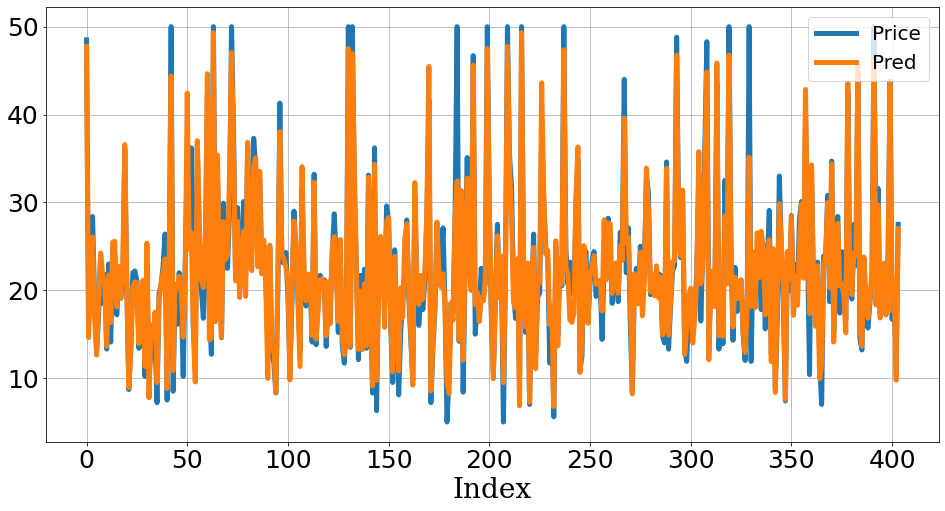

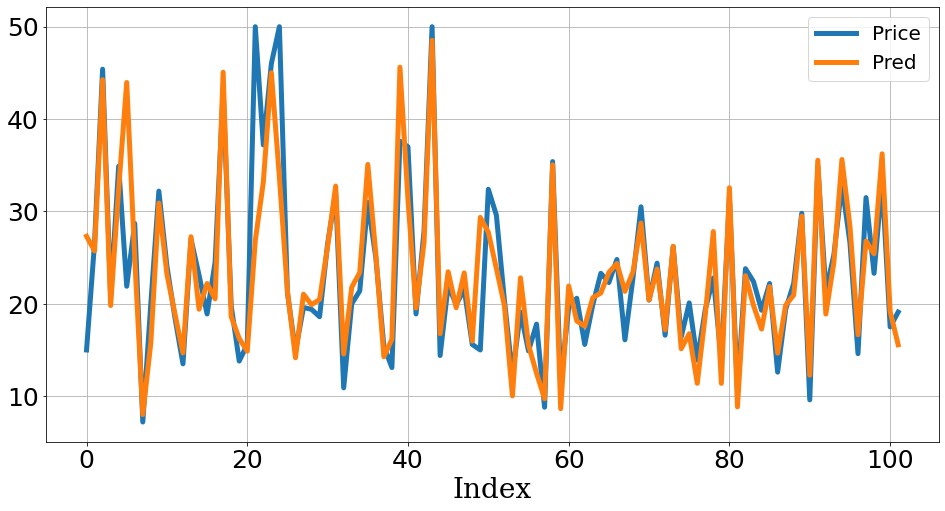

MAE   MSE  MAPE
Train 1.62  5.51  0.08
Test  2.71 22.01  0.13

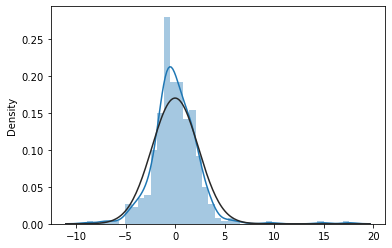

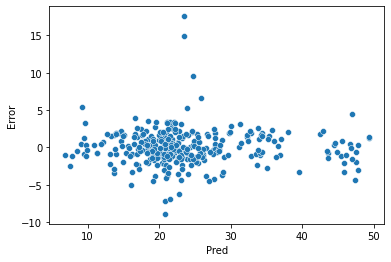

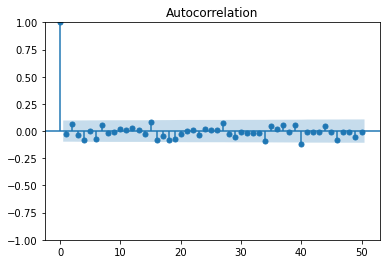

Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics       0.89               0.95             8.65   
p-value               0.00               0.72             0.57   
Alternative            NaN          two-sided              NaN   

                 Autocorr(lag50)  
Test Statistics            46.23  
p-value                     0.63  
Alternative                  NaN

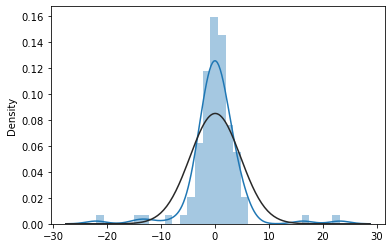

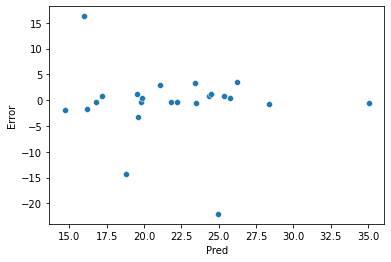

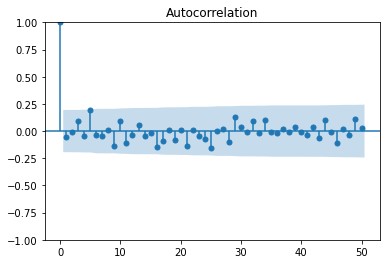

Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics       0.78               0.09             9.47   
p-value               0.00               0.00             0.49   
Alternative            NaN          two-sided              NaN   

                 Autocorr(lag50)  
Test Statistics            38.89  
p-value                     0.87  
Alternative                  NaN

In [16]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'BostonHousingPrice', 'Price_Modify_KK.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# LightGBM
model_lgbm = LGBMRegressor(n_estimators=100,
                           learning_rate=0.1,
                           max_depth=3, random_state=123)
model_lgbm.fit(X_train_fes, Y_train)

Y_trpred = pd.DataFrame(model_lgbm.predict(X_train_fes), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model_lgbm.predict(X_test_fes), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_lgbm = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_lgbm)

# 에러 분석
Resid_tr = Y_train - Y_trpred.values
Resid_tr.columns = ['Error']
Resid_te = Y_test - Y_tepred.values
Resid_te.columns = ['Error']

Error_tr = error_analysis(X_train_fes, Y_trpred, Resid_tr, graph_on=True)
display(Error_tr)
Error_te = error_analysis(X_test_fes, Y_tepred, Resid_te, graph_on=True)
display(Error_te)

## LightGBM with Hyperparameter Tuning

(404, 13) (404, 1)
(102, 13) (102, 1)
최적 하이퍼 파라미터:  {'max_depth': 11, 'min_child_weight': 5, 'n_estimators': 100}


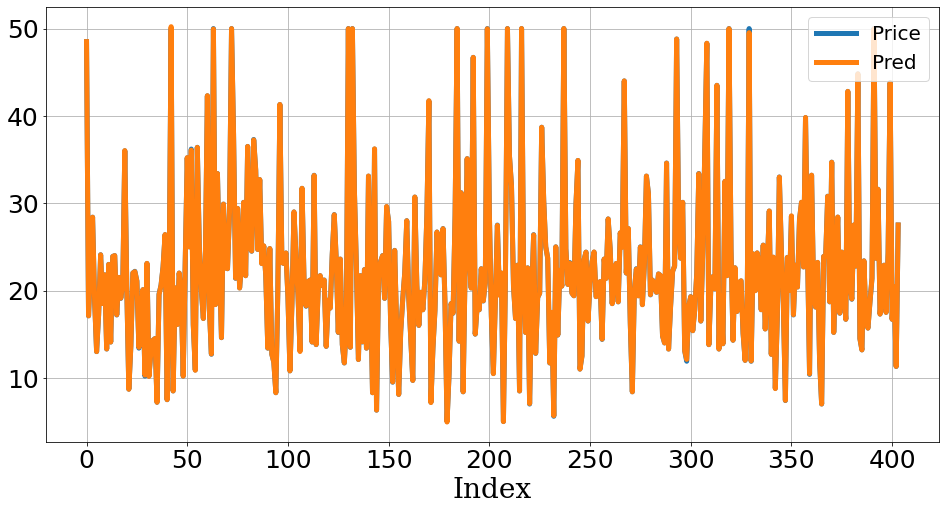

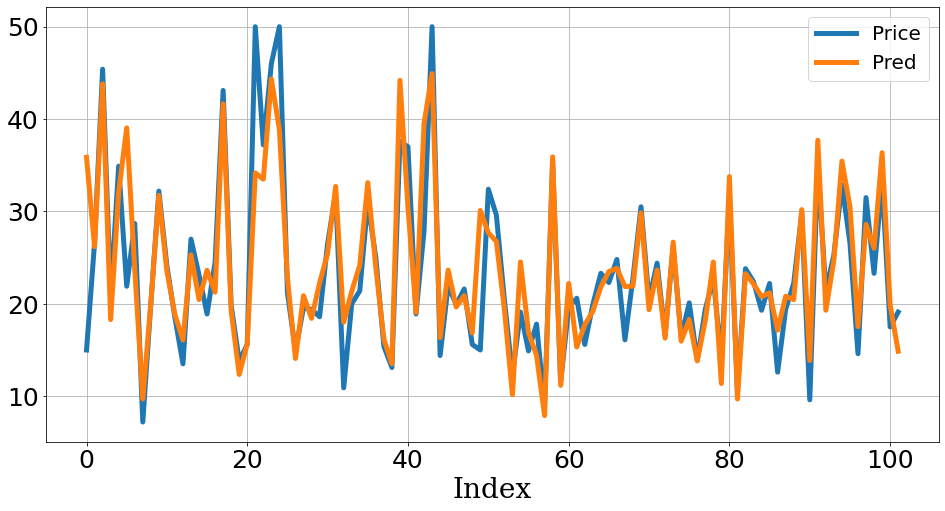

MAE   MSE  MAPE
Train 0.02  0.00  0.00
Test  2.80 20.73  0.14

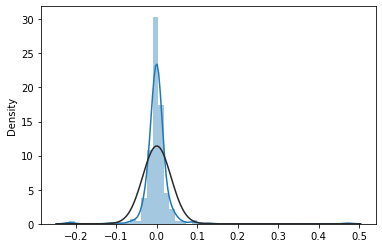

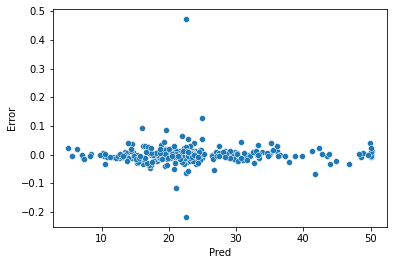

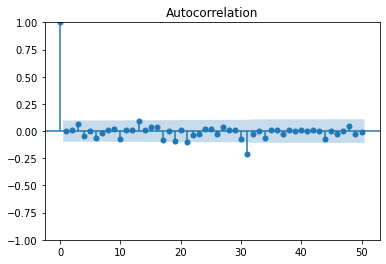

Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics       0.53               2.35             6.80   
p-value               0.00               0.00             0.74   
Alternative            NaN          two-sided              NaN   

                 Autocorr(lag50)  
Test Statistics            53.58  
p-value                     0.34  
Alternative                  NaN

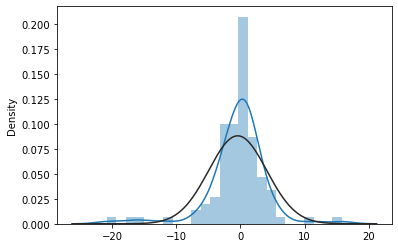

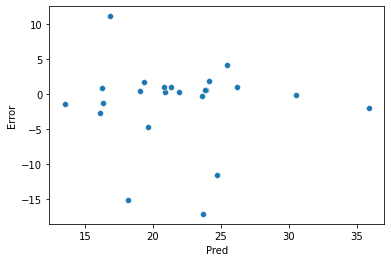

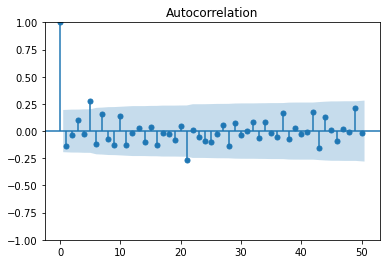

Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics       0.83               0.14            20.17   
p-value               0.00               0.00             0.03   
Alternative            NaN          two-sided              NaN   

                 Autocorr(lag50)  
Test Statistics            76.20  
p-value                     0.01  
Alternative                  NaN

In [17]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'BostonHousingPrice', 'Price_Modify_KK.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# LightGBM
model_lgbm = LGBMRegressor()
params = {'n_estimators': [100],    
          'max_depth': [5, 7, 9, 11],   
          'min_child_weight': [5, 7, 9, 11]}    
model_lgbm_cv = GridSearchCV(estimator=model_lgbm, param_grid=params, 
                             cv=5,    
                             n_jobs=-1)   
model_lgbm_cv.fit(X_train_fes, Y_train)
print("최적 하이퍼 파라미터: ", model_lgbm_cv.best_params_)

model_lgbm_cv_final = XGBRegressor(**model_lgbm_cv.best_params_)
model_lgbm_cv_final.fit(X_train_fes, Y_train)

Y_trpred = pd.DataFrame(model_lgbm_cv_final.predict(X_train_fes), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model_lgbm_cv_final.predict(X_test_fes), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_lgbm_cv_final = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_lgbm_cv_final)

# 에러 분석
Resid_tr = Y_train - Y_trpred.values
Resid_tr.columns = ['Error']
Resid_te = Y_test - Y_tepred.values
Resid_te.columns = ['Error']

Error_tr = error_analysis(X_train_fes, Y_trpred, Resid_tr, graph_on=True)
display(Error_tr)
Error_te = error_analysis(X_test_fes, Y_tepred, Resid_te, graph_on=True)
display(Error_te)

## CatBoost

(404, 13) (404, 1)
(102, 13) (102, 1)


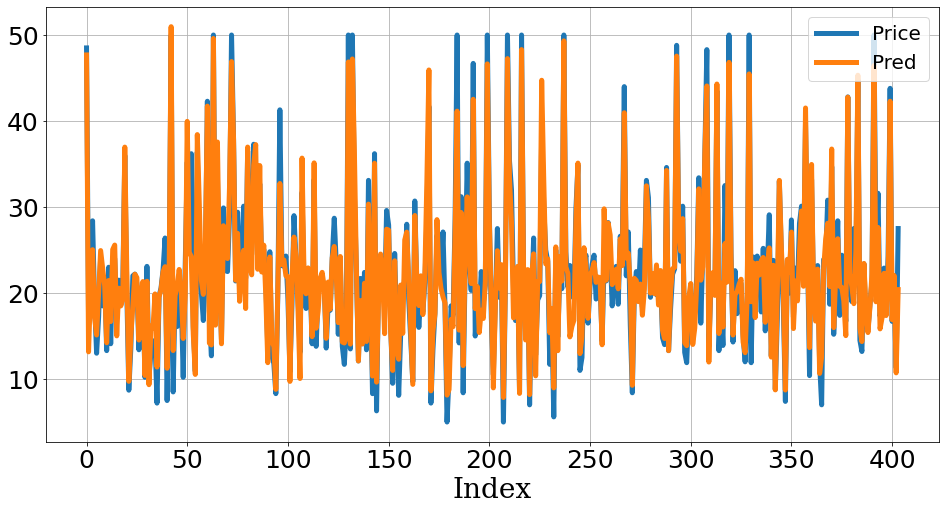

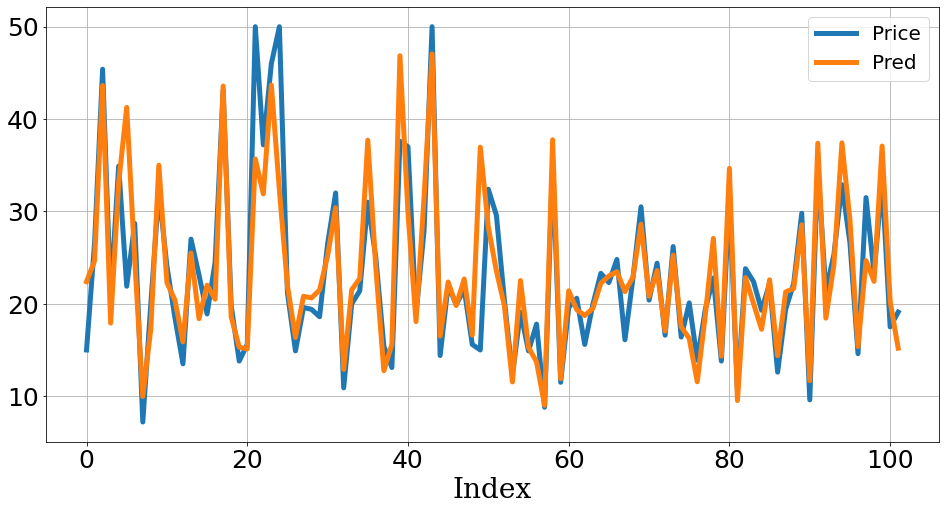

MAE   MSE  MAPE
Train 1.88  6.21  0.10
Test  2.87 21.38  0.13

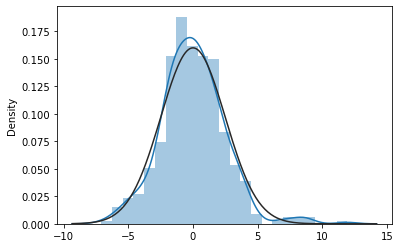

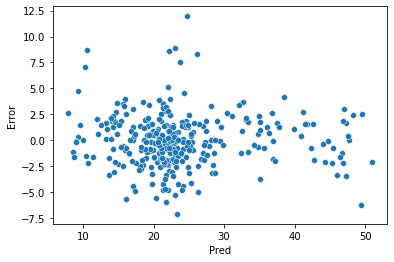

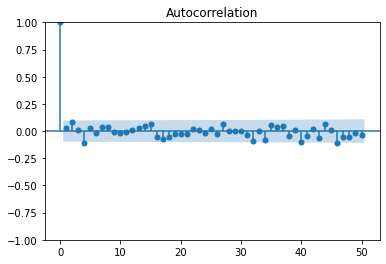

Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics       0.97               0.77             9.43   
p-value               0.00               0.08             0.49   
Alternative            NaN          two-sided              NaN   

                 Autocorr(lag50)  
Test Statistics            50.67  
p-value                     0.45  
Alternative                  NaN

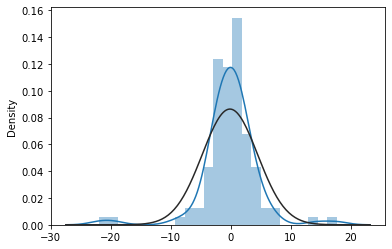

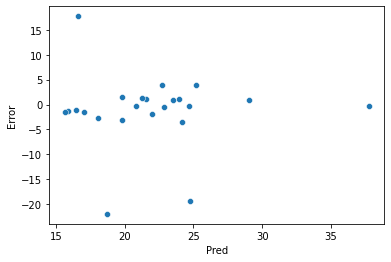

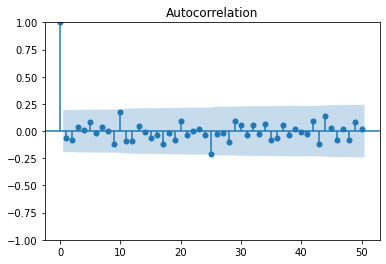

Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics       0.82               0.13             7.42   
p-value               0.00               0.00             0.69   
Alternative            NaN          two-sided              NaN   

                 Autocorr(lag50)  
Test Statistics            39.84  
p-value                     0.85  
Alternative                  NaN

In [18]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'BostonHousingPrice', 'Price_Modify_KK.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# CatBoost
model_cb = CatBoostRegressor(n_estimators=100,
                             learning_rate=0.1,
                             max_depth=3, random_state=123,
                             verbose=0)
model_cb.fit(X_train_fes, Y_train)

Y_trpred = pd.DataFrame(model_cb.predict(X_train_fes), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model_cb.predict(X_test_fes), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_cb = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_cb)

# 에러 분석
Resid_tr = Y_train - Y_trpred.values
Resid_tr.columns = ['Error']
Resid_te = Y_test - Y_tepred.values
Resid_te.columns = ['Error']

Error_tr = error_analysis(X_train_fes, Y_trpred, Resid_tr, graph_on=True)
display(Error_tr)
Error_te = error_analysis(X_test_fes, Y_tepred, Resid_te, graph_on=True)
display(Error_te)

## CatBoost with Hyperparameter Tuning

(404, 13) (404, 1)
(102, 13) (102, 1)
최적 하이퍼 파라미터:  {'max_depth': 11, 'n_estimators': 100}
Learning rate set to 0.230668
0:	learn: 7.9575084	total: 6.77ms	remaining: 671ms
1:	learn: 7.0990421	total: 42.6ms	remaining: 2.09s
2:	learn: 6.3603392	total: 79.9ms	remaining: 2.58s
3:	learn: 5.7295800	total: 113ms	remaining: 2.71s
4:	learn: 5.2363151	total: 147ms	remaining: 2.78s
5:	learn: 4.8517084	total: 185ms	remaining: 2.9s
6:	learn: 4.4422910	total: 199ms	remaining: 2.65s
7:	learn: 4.0879733	total: 242ms	remaining: 2.78s
8:	learn: 3.8547386	total: 282ms	remaining: 2.85s
9:	learn: 3.5780870	total: 317ms	remaining: 2.85s
10:	learn: 3.3403103	total: 357ms	remaining: 2.89s
11:	learn: 3.1586534	total: 392ms	remaining: 2.88s
12:	learn: 3.0168133	total: 435ms	remaining: 2.91s
13:	learn: 2.8510133	total: 473ms	remaining: 2.91s
14:	learn: 2.6937597	total: 511ms	remaining: 2.9s
15:	learn: 2.5594085	total: 548ms	remaining: 2.88s
16:	learn: 2.4145479	total: 582ms	remaining: 2.84s
17:	learn: 2.3203988	

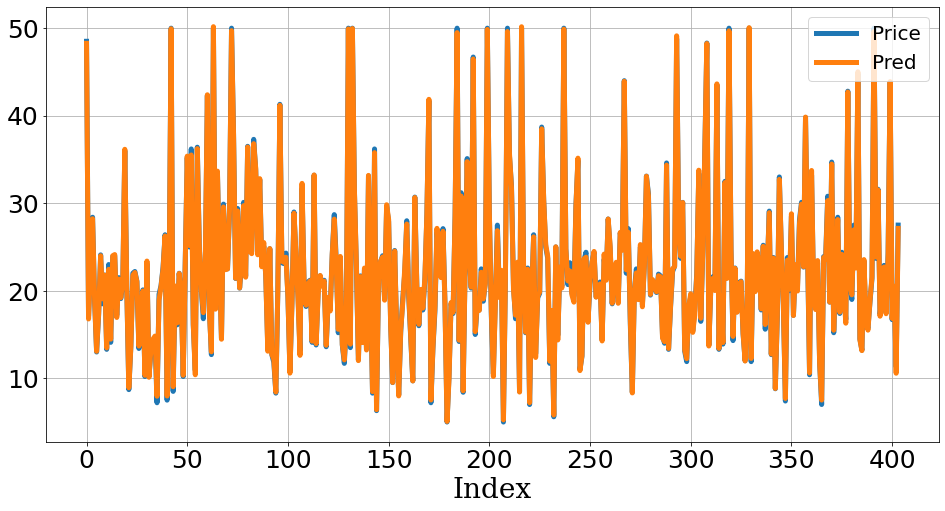

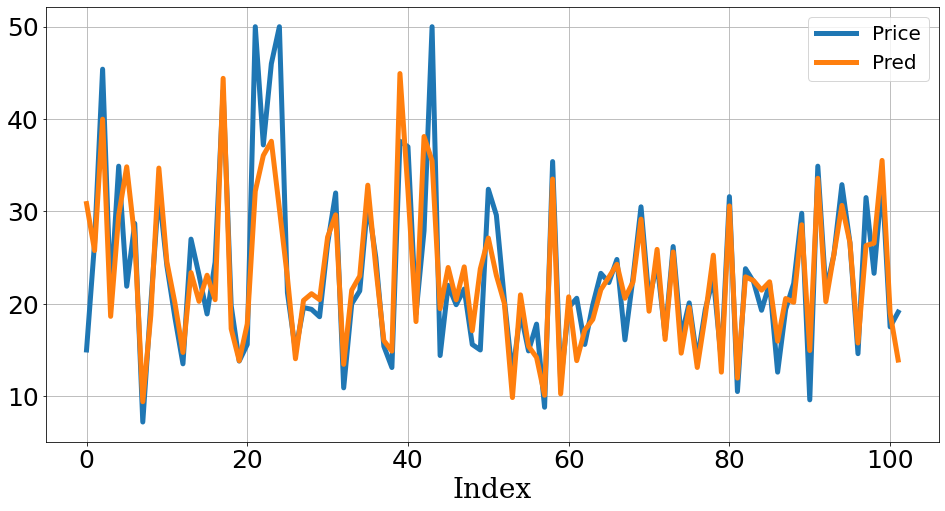

MAE   MSE  MAPE
Train 0.23  0.08  0.01
Test  2.93 21.77  0.13

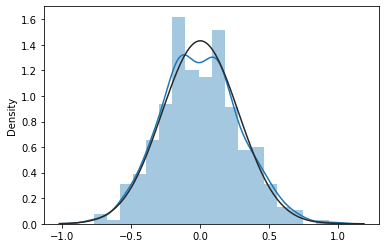

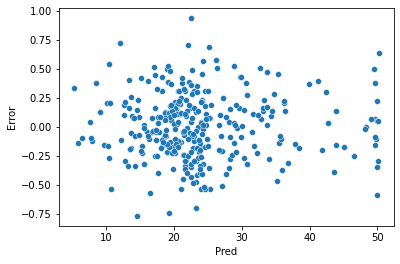

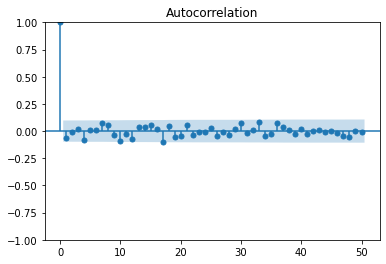

Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics       1.00               0.89            12.76   
p-value               0.64               0.43             0.24   
Alternative            NaN          two-sided              NaN   

                 Autocorr(lag50)  
Test Statistics            42.18  
p-value                     0.78  
Alternative                  NaN

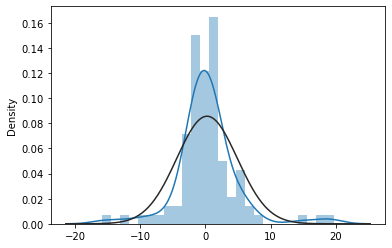

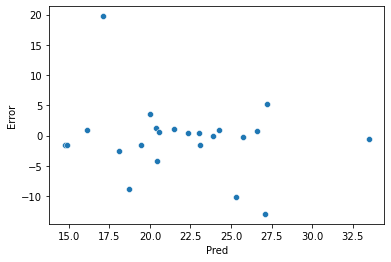

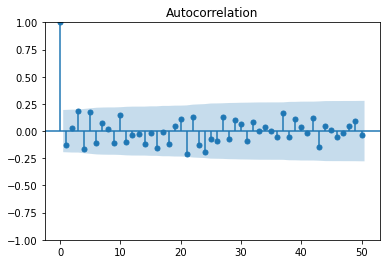

Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics       0.85               0.12            17.73   
p-value               0.00               0.00             0.06   
Alternative            NaN          two-sided              NaN   

                 Autocorr(lag50)  
Test Statistics            71.04  
p-value                     0.03  
Alternative                  NaN

In [19]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'BostonHousingPrice', 'Price_Modify_KK.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# CatBoost
model_cb = CatBoostRegressor(verbose=0)
params = {'n_estimators': [100],    
          'max_depth': [5, 7, 9, 11]}    
model_cb_cv = GridSearchCV(estimator=model_cb, param_grid=params, 
                           cv=5,    
                           n_jobs=-1)   
model_cb_cv.fit(X_train_fes, Y_train)
print("최적 하이퍼 파라미터: ", model_cb_cv.best_params_)

model_cb_cv_final = CatBoostRegressor(**model_cb_cv.best_params_)
model_cb_cv_final.fit(X_train_fes, Y_train)

Y_trpred = pd.DataFrame(model_cb_cv_final.predict(X_train_fes), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model_cb_cv_final.predict(X_test_fes), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_cb_cv_final = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_cb_cv_final)

# 에러 분석
Resid_tr = Y_train - Y_trpred.values
Resid_tr.columns = ['Error']
Resid_te = Y_test - Y_tepred.values
Resid_te.columns = ['Error']

Error_tr = error_analysis(X_train_fes, Y_trpred, Resid_tr, graph_on=True)
display(Error_tr)
Error_te = error_analysis(X_test_fes, Y_tepred, Resid_te, graph_on=True)
display(Error_te)

# **Advanced Algorithm:** Stacking

## Stacking

(404, 13) (404, 1)
(102, 13) (102, 1)


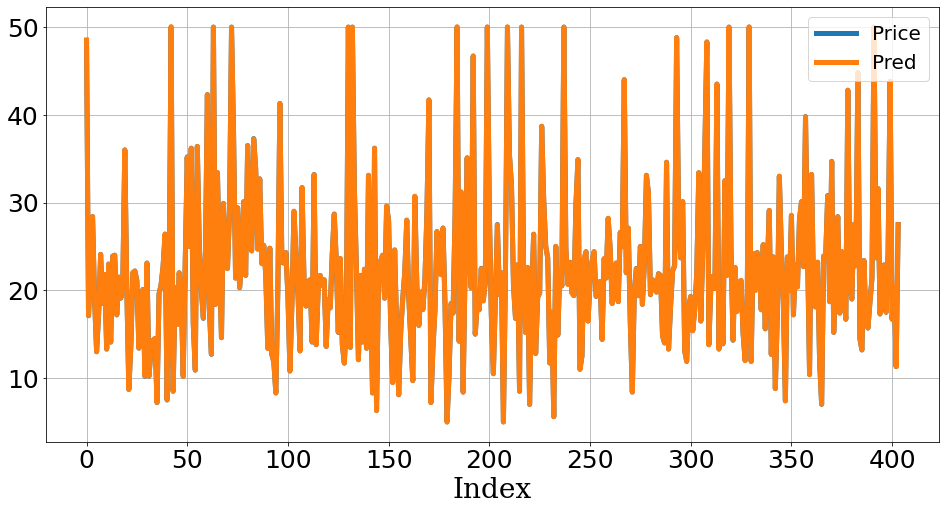

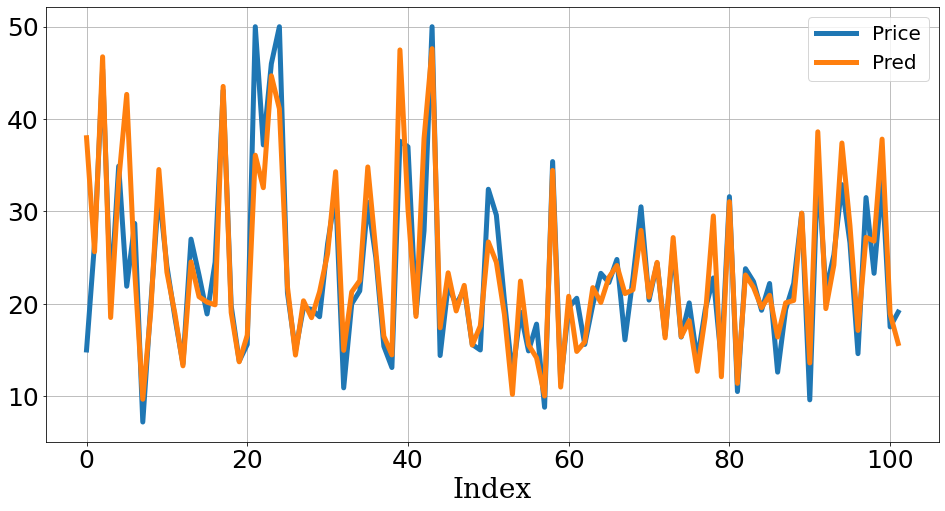

MAE   MSE  MAPE
Train 0.01  0.00  0.00
Test  2.67 20.04  0.12

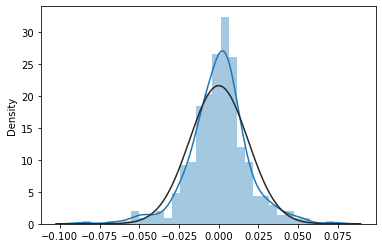

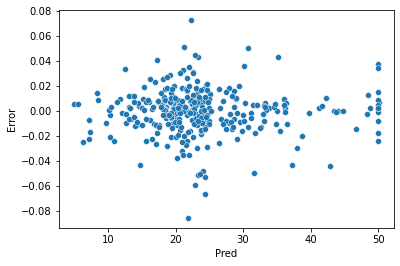

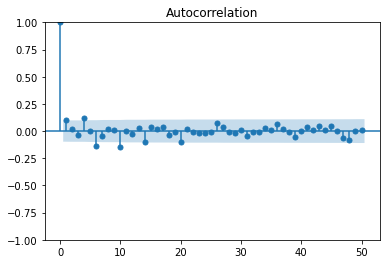

Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics       0.96               1.07            29.32   
p-value               0.00               0.63             0.00   
Alternative            NaN          two-sided              NaN   

                 Autocorr(lag50)  
Test Statistics            56.55  
p-value                     0.24  
Alternative                  NaN

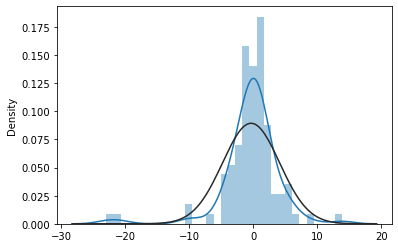

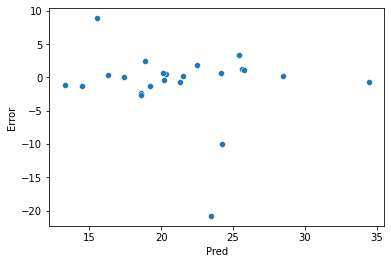

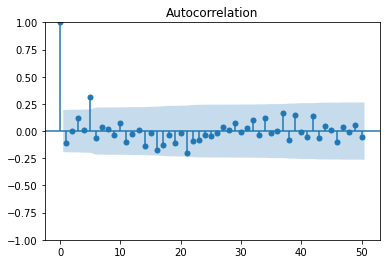

Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics       0.80               0.18            14.77   
p-value               0.00               0.00             0.14   
Alternative            NaN          two-sided              NaN   

                 Autocorr(lag50)  
Test Statistics            57.33  
p-value                     0.22  
Alternative                  NaN

In [20]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'BostonHousingPrice', 'Price_Modify_KK.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Stacking
## Weak Learners
model_knn = KNeighborsRegressor()
model_svm = SVR()
model_rf = RandomForestRegressor()
model_xgb = XGBRegressor()

model_reg = LinearRegression()
res = [model_knn, model_svm, model_rf, model_xgb]
model_stack = StackingRegressor(regressors=res, 
                                meta_regressor=model_reg)
model_stack.fit(X_train_fes, Y_train)

Y_trpred = pd.DataFrame(model_stack.predict(X_train_fes), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model_stack.predict(X_test_fes), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_stack = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_stack)

# 에러 분석
Resid_tr = Y_train - Y_trpred.values
Resid_tr.columns = ['Error']
Resid_te = Y_test - Y_tepred.values
Resid_te.columns = ['Error']

Error_tr = error_analysis(X_train_fes, Y_trpred, Resid_tr, graph_on=True)
display(Error_tr)
Error_te = error_analysis(X_test_fes, Y_tepred, Resid_te, graph_on=True)
display(Error_te)

## Stacking with Hyperparameter Tuning

(404, 13) (404, 1)
(102, 13) (102, 1)


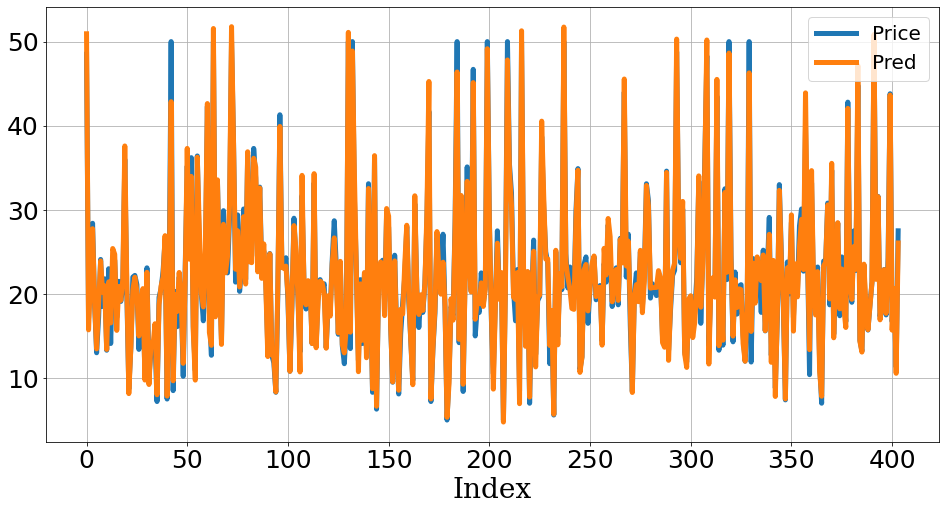

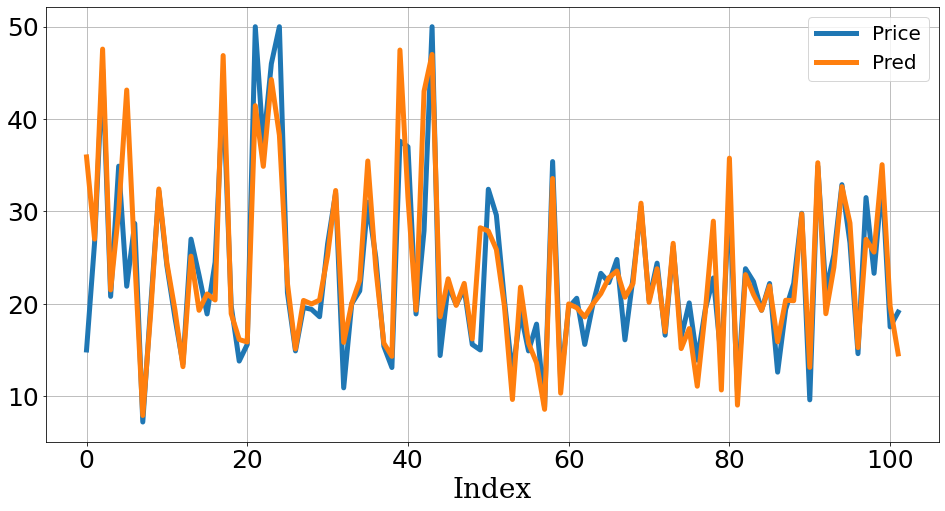

MAE   MSE  MAPE
Train 0.90  1.44  0.04
Test  2.63 20.81  0.12

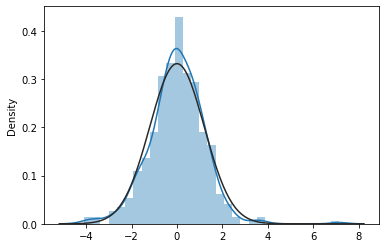

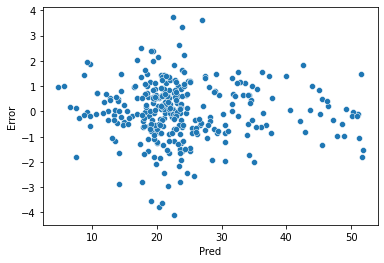

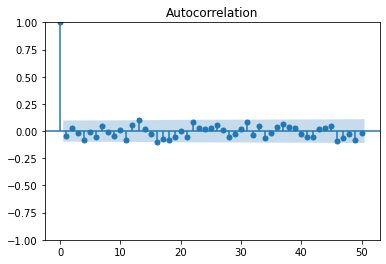

Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics       0.97               0.73             7.15   
p-value               0.00               0.03             0.71   
Alternative            NaN          two-sided              NaN   

                 Autocorr(lag50)  
Test Statistics            58.00  
p-value                     0.20  
Alternative                  NaN

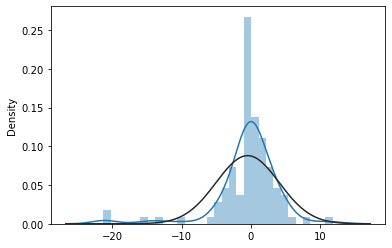

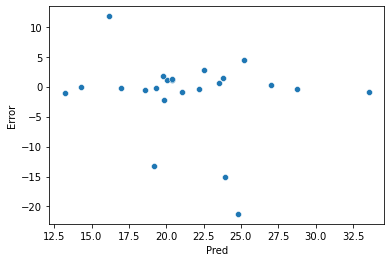

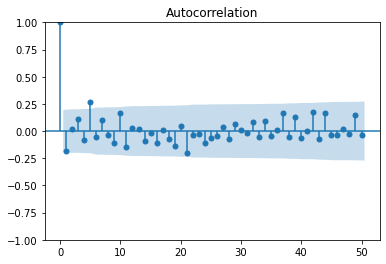

Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics       0.78               0.10            19.58   
p-value               0.00               0.00             0.03   
Alternative            NaN          two-sided              NaN   

                 Autocorr(lag50)  
Test Statistics            65.92  
p-value                     0.07  
Alternative                  NaN

In [21]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'BostonHousingPrice', 'Price_Modify_KK.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Stacking
## Weak Learners
model_knn = KNeighborsRegressor()
model_svm = SVR()
model_rf = RandomForestRegressor()
model_xgb = XGBRegressor()

model_reg = LinearRegression()
res = [model_knn, model_svm, model_rf, model_xgb]
model_stack = StackingCVRegressor(regressors=res, meta_regressor=model_reg)

params = {'kneighborsregressor__n_neighbors': [5, 7],
          'svr__kernel': ['rbf'],
          'randomforestregressor__n_estimators': [100],
          'randomforestregressor__max_depth': [5, 7, 9],    
          'xgbregressor__n_estimators': [100],    
          'xgbregressor__max_depth': [5, 7, 9]}
model_stack_cv = GridSearchCV(estimator=model_stack, param_grid=params, 
                              cv=5,    # CV 반복 횟수
                              n_jobs=-1)    # n_jobs=-1이면 모든 cpu사용 학습
model_stack_cv.fit(X_train_fes, Y_train)

Y_trpred = pd.DataFrame(model_stack_cv.predict(X_train_fes), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model_stack_cv.predict(X_test_fes), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_stack_cv = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_stack_cv)

# 에러 분석
Resid_tr = Y_train - Y_trpred.values
Resid_tr.columns = ['Error']
Resid_te = Y_test - Y_tepred.values
Resid_te.columns = ['Error']

Error_tr = error_analysis(X_train_fes, Y_trpred, Resid_tr, graph_on=True)
display(Error_tr)
Error_te = error_analysis(X_test_fes, Y_tepred, Resid_te, graph_on=True)
display(Error_te)

# **Comparison**

MAE   MSE  MAPE
Linear Regression 3.51 31.34  0.17
Ridge             3.51 31.30  0.17
Lasso             3.75 34.78  0.18
Elastic Net       3.56 32.00  0.17
Voting            2.86 25.04  0.12
Decision Tree     3.51 42.36  0.18
Random Forest     2.71 25.67  0.13
RF with CF        2.87 28.39  0.13
Gradient Boosting 2.61 20.01  0.13
GBM with CV       2.90 25.93  0.14
XGBoost           2.58 20.04  0.12
XGBoost with CV   2.61 21.45  0.13
LightGBM          2.71 22.01  0.13
LightGBM with CV  2.80 20.73  0.14
CatbBoost         2.87 21.38  0.13
CatBoost with CV  2.93 21.77  0.13
Stacking          2.67 20.04  0.12
Stacking with CV  2.63 20.81  0.12

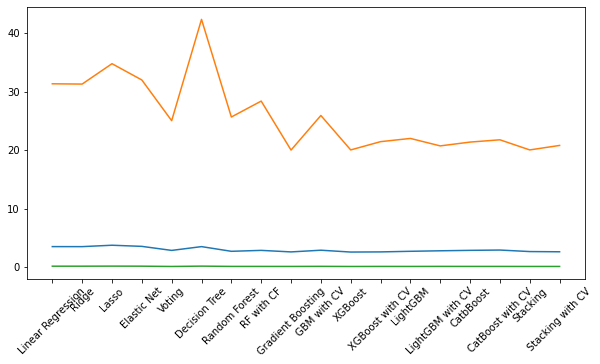

In [22]:
# 결과비교
labels = ['Linear Regression', 'Ridge', 'Lasso', 'Elastic Net', 
          'Voting', 'Decision Tree', 'Random Forest', 'RF with CF', 
          'Gradient Boosting', 'GBM with CV', 'XGBoost', 'XGBoost with CV', 
          'LightGBM', 'LightGBM with CV', 'CatbBoost', 'CatBoost with CV',
          'Stacking', 'Stacking with CV']
models = [Score_lr, Score_ridge, Score_lasso, Score_en, Score_voting, Score_dt,
          Score_rf, Score_rf_cv_final, Score_gb, Score_gb_cv_final,
          Score_xgb, Score_xgb_cv_final, Score_lgbm, Score_lgbm_cv_final, 
          Score_cb, Score_cb_cv_final, Score_stack, Score_stack_cv]
result_regression = pd.DataFrame()
for result in models:
    result_regression = pd.concat([result_regression, result.iloc[1:,:]], axis=0)
result_regression.index = labels
display(result_regression)

# 시각화
plt.figure(figsize=(10,5))
plt.plot(result_regression)
plt.xticks(rotation=45)
plt.show()